In [1]:
import importlib
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import minmax_scale
from sklearn import cluster
from sklearn import decomposition
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.collections as collections
import scipy
import shapefile
%matplotlib inline
import seaborn as sns

Читаем источник данных (файл в формате .xlsx) с помощью метода read_excel библиотеки Pandas предазначенной для работы 
с данными, прежде всего для операций с DataFrames - основным способом представления данных используемым различным программным обеспечением в области Machiene Learning / Data Science. Каждый лист Excel-я читаем отдельно
получая для каждого листа отдельный датафрейм.

In [2]:
excel_file = pd.ExcelFile('source_data.xlsx')

In [3]:
sheet0 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[0],
        skiprows=[0],
        header=1,
    )
sheet0 = sheet0[sheet0.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet0.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [4]:
sheet1 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[1],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet1 = sheet1[sheet1.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet1.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [5]:
sheet2 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[2],
        skiprows=[0, 1],
        header=1,
    )
sheet2 = sheet2[sheet2.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet2.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [6]:
sheet3 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[3],
        skiprows=[0, 1],
        header=1,
    )
sheet3 = sheet3[sheet3.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet3.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [7]:
sheet4 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[4],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet4 = sheet4[sheet4.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet4.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [8]:
sheet5 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[5],
        skiprows=[0, 1],
        header=1,
    )
sheet5 = sheet5[sheet5.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet5.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [9]:
sheet6 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[6],
        skiprows=[0, 1, 2, 3, 4],
        header=1,
    )
sheet6 = sheet6[sheet6.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet6.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [10]:
sheet7 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[7],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet7 = sheet7[sheet7.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet7.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [11]:
sheet8 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[8],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet8 = sheet8[sheet8.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet8.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [12]:
sheet9 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[9],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet9 = sheet9[sheet9.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet9.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [13]:
sheet10 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[10],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet10 = sheet10[sheet10.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet10.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [14]:
sheet11 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[11],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet11 = sheet11[sheet11.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet11.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [15]:
sheet12 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[12],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet12 = sheet12[sheet12.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet12.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [16]:
sheet13 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[13],
        skiprows=[0, 1],
        header=1,
    )
sheet13 = sheet13[sheet13.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet13.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [17]:
sheet14 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[14],
        skiprows=[0, 1],
        header=1,
    )
sheet14 = sheet14[sheet14.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet14.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [18]:
sheet15 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[15],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet15 = sheet15[sheet15.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet15.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [19]:
sheet16 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[16],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet16 = sheet16[sheet16.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet16.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [20]:
sheet17 = pd.read_excel('source_data_1.xlsx')
sheet17 = sheet17[sheet17.columns.drop(['Unnamed: 11', 'ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ'])]
sheet17.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

Для дальнейших операций объединяем полученные датафреймы в список, который в свою очередь состоит из подсписков 
содержащих собственно сам датафрейм и ассоциированное с ним название максимально соответствующее русскому названию
экселевского листа. В дальнейшем, эти названия станут именами столбцов датафреймов содержащих информацию разбитую по годам.

In [21]:
list_of_df = []
list_of_df.append([sheet0, 'OrganizationNum'])
list_of_df.append([sheet1, 'StaffNum'])
list_of_df.append([sheet2, 'PhDNum'])
list_of_df.append([sheet3, 'Ph.DNum'])
list_of_df.append([sheet4, 'PostgraduateNum'])
list_of_df.append([sheet5, 'DoctoralNum'])
list_of_df.append([sheet6, 'PatentNum'])
list_of_df.append([sheet7, 'UsefulPatentsNum'])
list_of_df.append([sheet8, 'CreatedTechnologyNum'])
list_of_df.append([sheet9, 'UsefulTechnologyNum'])
list_of_df.append([sheet10, 'ProportionOfOrganizationsToUseInternet'])
list_of_df.append([sheet11, 'ProportionOfInnovativeOrgainzations'])
list_of_df.append([sheet12, 'TechnologicalInnovationsCost'])
list_of_df.append([sheet13, 'AmountOfInnovativeProducts'])
list_of_df.append([sheet14, 'ProportionOfInnovativeProducts'])
list_of_df.append([sheet15, 'Population'])
list_of_df.append([sheet16, 'GrossProduct'])
list_of_df.append([sheet17, 'InternalCosts'])

Отдельно сохраняем соответствующие русскоязычные названия в виде списка, в том же порядке в котором идут датафреймы с списке датафреймов.

In [22]:
features_names_ru = [
    'ОРГАНИЗАЦИИ, ВЫПОЛНЯЮЩИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ',
    'численность персонала без ученых степеней, занятых НИОКР',
    'Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации показатель кандидата наук- человек',
    'Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации показатель доктора наук- человек',
    'Численность аспирантов по субъектам Российской Федерации - человек',
    'Численность докторантов по субъектам Российской Федерации 0человек',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ИЗОБРЕТЕНИЯ',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ПОЛЕЗНЫЕ МОДЕЛИ',
    'РАЗРАБОТАННЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ ) (В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ)',
    'ИННОВАЦИОННАЯ АКТИВНОСТЬ ОРГАНИЗАЦИЙ (УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ, ОСУЩЕСТВЛЯВШИХ ТЕХНОЛОГИЧЕСКИЕ, ОРГАНИЗАЦИОННЫЕ, МАРКЕТИНГОВЫЕ ИННОВАЦИИ В ОТЧЕТНОМ ГОДУ, В ОБЩЕМ ЧИСЛЕ ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ ( %)',
    'ЗАТРАТЫ НА ТЕХНОЛОГИЧЕСКИЕ ИННОВАЦИИ ОРГАНИЗАЦИЙ (руб)',
    'ОБЪЕМ ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ (МИЛЛИОНОВ РУБЛЕЙ)',
    'УДЕЛЬНЫЙ ВЕС ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ В ОБЩЕМ ОБЪЕМЕ ОТГРУЖЕННЫХ ТОВАРОВ, ВЫПОЛНЕННЫХ РАБОТ, УСЛУГ1), ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ (%)',
    'численность населения по субъектам российской федерации (оценка на конец года; тысяч человек)',
    'Валовой региональный продукт по субъектам Российской Федерации (в текущих  ценах;миллионов рублей)'
]

Избаляемся от строчки "Всего" в каждом датафрейме из списка.

In [23]:
for i, df_container in enumerate(list_of_df):
    df = df_container[0]
    list_of_df[i][0] = df[df.Region != 'ВСЕГО']    

Создаём список "годовых" датафреймов, каждый из которых содержит полный список показателей (features в терминах Data Science) для каждого региона (Столбцы - показатели, строки - регионы). Используем стандартную операцию Pandas-овских датафреймов merege. В качестве столбца используемого для объединения используем столбец "Region".

In [24]:
merged_df_list = []
for year in range(2005, 2015):
    result_df, feature_name = list_of_df[0]
    result_df = result_df[['Region', year]]
    result_df = result_df.rename_axis({year: feature_name} ,axis='columns')
    
    merged_df_list.append(result_df)
    
    for i in range(1, 18):
        merged_df, feature_name = list_of_df[i]
        merged_df = merged_df[['Region', year]]
        merged_df = merged_df.rename_axis({year: feature_name} ,axis='columns')
        merged_df_list[year - 2005] = pd.merge(
            merged_df_list[year - 2005],
            merged_df,
            on='Region')

Вспомогательные функции для корректировки некорректно представленных значений (например содержащих в качестве десятичного разделителя запятую) в датафреймах.

In [25]:
def str_to_num(s):
    if isinstance(s, str):
        s = s.replace(',', '.')
        s1 = s.replace(',', '')
        if s1.isdigit():
            return float(s)
    return s

In [26]:
def detect_minus(x):
    if x == '-':
        print(x)
        return True
    return False

Импортируем стандартный класс библиотеки ScikitLearn для приведения значений к одному и тому же масштабу. Создаём экземпляр этого класса.

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
#merged_df_list[0].set_value(36, 'PostgraduateNum', 0)

Region  OrganizationNum  StaffNum  PhDNum  Ph.DNum  \
0           Белгородская область               23       559      92       15   
1               Брянская область               20      1136      44        8   
2           Владимирская область               35      2337     297       52   
3            Воронежская область               57      6114     783      119   
4             Ивановская область               30       435     196       48   
5              Калужская область               33      3495     787      205   
6            Костромская область                8        71      18        2   
7                Курская область               23       713      66       24   
8               Липецкая область               10        49      43       27   
9             Московская область              206     30899    6456     1659   
10             Орловская область               18       330      87       19   
11             Рязанская область               16      1052     132       23   
12            Смоленская область               14       299      51        8   
13            Тамбовская область               23       828     145       24   
14              Тверская область               42      2583     423       54   
15              Тульская область               22      3698     154       43   
16           Ярославская область               26      1769     291       61   
17                        Москва              787     93778   32695    11234   
18            Республика Карелия               16       216     278       70   
19               Республика Коми               19       745     335       82   
20         Архангельская область               24       723     104        0   
21     Ненецкий автономный округ                2        12       1        0   
22           Вологодская область               15       215      46        6   
23       Калинингpадская область               14       638     105       14   
24         Ленинградская область               17      1804     501      103   
25            Мурманская область               28       526     384      107   
26          Новгородская область               10       471      19        1   
27             Псковская область               10       111      30        3   
28             Республика Адыгея                3        49      28       14   
29           Республика Калмыкия                8        67      66       11   
..                           ...              ...       ...     ...      ...   
47          Оренбургская область               14       335     139       37   
48            Пензенская область               24      2817      95       15   
49             Самарская область               51      6335     458      106   
50           Саратовская область               57      2500     560      164   
51           Ульяновская область               22      2190     196       49   
52            Курганская область               15       395      71       31   
53          Свердловская область              117      7957    1764      535   
54             Тюменская область               33      1577     240       71   
55           Челябинская область               40      6834     623      138   
56              Республика Алтай                6        39      29        3   
57            Республика Бурятия               17       409     386      102   
58               Республика Тыва                6        87      59       11   
59            Республика Хакасия                3       103      92       22   
60                Алтайский край               35       900     237       59   
61            Забайкальский край               10       234       0        0   
62             Красноярский край               60      2932     566      195   
63             Иркутская область               35      1561     981      345   
64           Кемеровская область               29       567     172       54   
65         Новосибирская о

Корректируем вручную одно из неправильных значений, а ко всему остальному применяем функции коррктировки.

In [30]:
merged_df_list[0].set_value(36, 'PostgraduateNum', 0)
merged_df_dict = {}
for i in range(0, 10):
    prepared_df = merged_df_list[i].applymap(str_to_num)
    prepared_df = prepared_df.applymap(lambda x: 0.0 if x in ['-', '0)'] else x)
    merged_df_dict[i + 2005] = prepared_df   

Объединяем список "годовых" датафреймов в один датафрейм с иеррархическим индексом "Год/Регион". В дальнейшем будем производить кластеризацию используя именно этот датафрейм.

In [31]:
hier_concatenated_df = pd.concat(merged_df_dict, names=['Year', 'Region'])

In [32]:
hier_concatenated_df = hier_concatenated_df.applymap(str_to_num)
hier_concatenated_df = hier_concatenated_df.applymap(lambda x: 0.0 if x in ['-', '0)'] else x)

Корректируем вручную ещё два неверных значения.

In [33]:
hier_concatenated_df.loc[(2014, 41), 'GrossProduct'] = 1671397.10

In [34]:
#droped_regions_hier_concatenated_df = hier_concatenated_df[hier_concatenated_df.columns.drop('Region')]

In [35]:
hier_concatenated_df.loc[(2014, 8), 'GrossProduct'] = 395700.10

In [36]:
droped_regions_hier_concatenated_df = hier_concatenated_df[hier_concatenated_df.columns.drop('Region')]

Приводим к единому масштабу, используя ранее созданный экземпляр класса MinMaxScaler.

In [37]:
scaled_with_dropped_regions_hier_concantenated_df = pd.DataFrame(
        scaler.fit_transform(droped_regions_hier_concatenated_df),
        columns=droped_regions_hier_concatenated_df.columns
    )

Алгоритмы машинного обучения в библиотеке ScikitLearn оформлены в виде классов, получающих на входе параметры определяюще работу соответствующего алгоритма, и значения используемые для обучения в виде массивов библиотеки Numpy.
Извлекаем из датафрейма соответствующий массив Numpy просто обращаясь к полю датафрейма .values.
В качестве алгоритам класстеризации используем MeanShift. В частности, потому что он не требует заранее задавать количество кластеров (в отличие например от наиболее популярного алгоритма "обучения без учителя" K-Means).
Создаём экземпляр класса MeanShift, задавая ему некоторые из параметров. Далее вызываем стандартный для всех классов ScikitLearn реализующих методы машинного обучения метод fit передавая ему массив обучающих значений.
После обращаясь уже к "обученному" (произведшему класстеризацию) экземпляру класса выводим количество получившихся кластеров.

In [38]:
prepared_df_values = scaled_with_dropped_regions_hier_concantenated_df.values
bandwidth = cluster.estimate_bandwidth(prepared_df_values, quantile=0.1, n_samples=prepared_df_values.shape[0])
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(prepared_df_values)
labels = ms.labels_
cluster_centres = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


Выводим (используя библиотеку Seaborn) кроскорреляционную матрицу. Кроме значения коэффициента корреляции степень корреляции выделяется цветом.

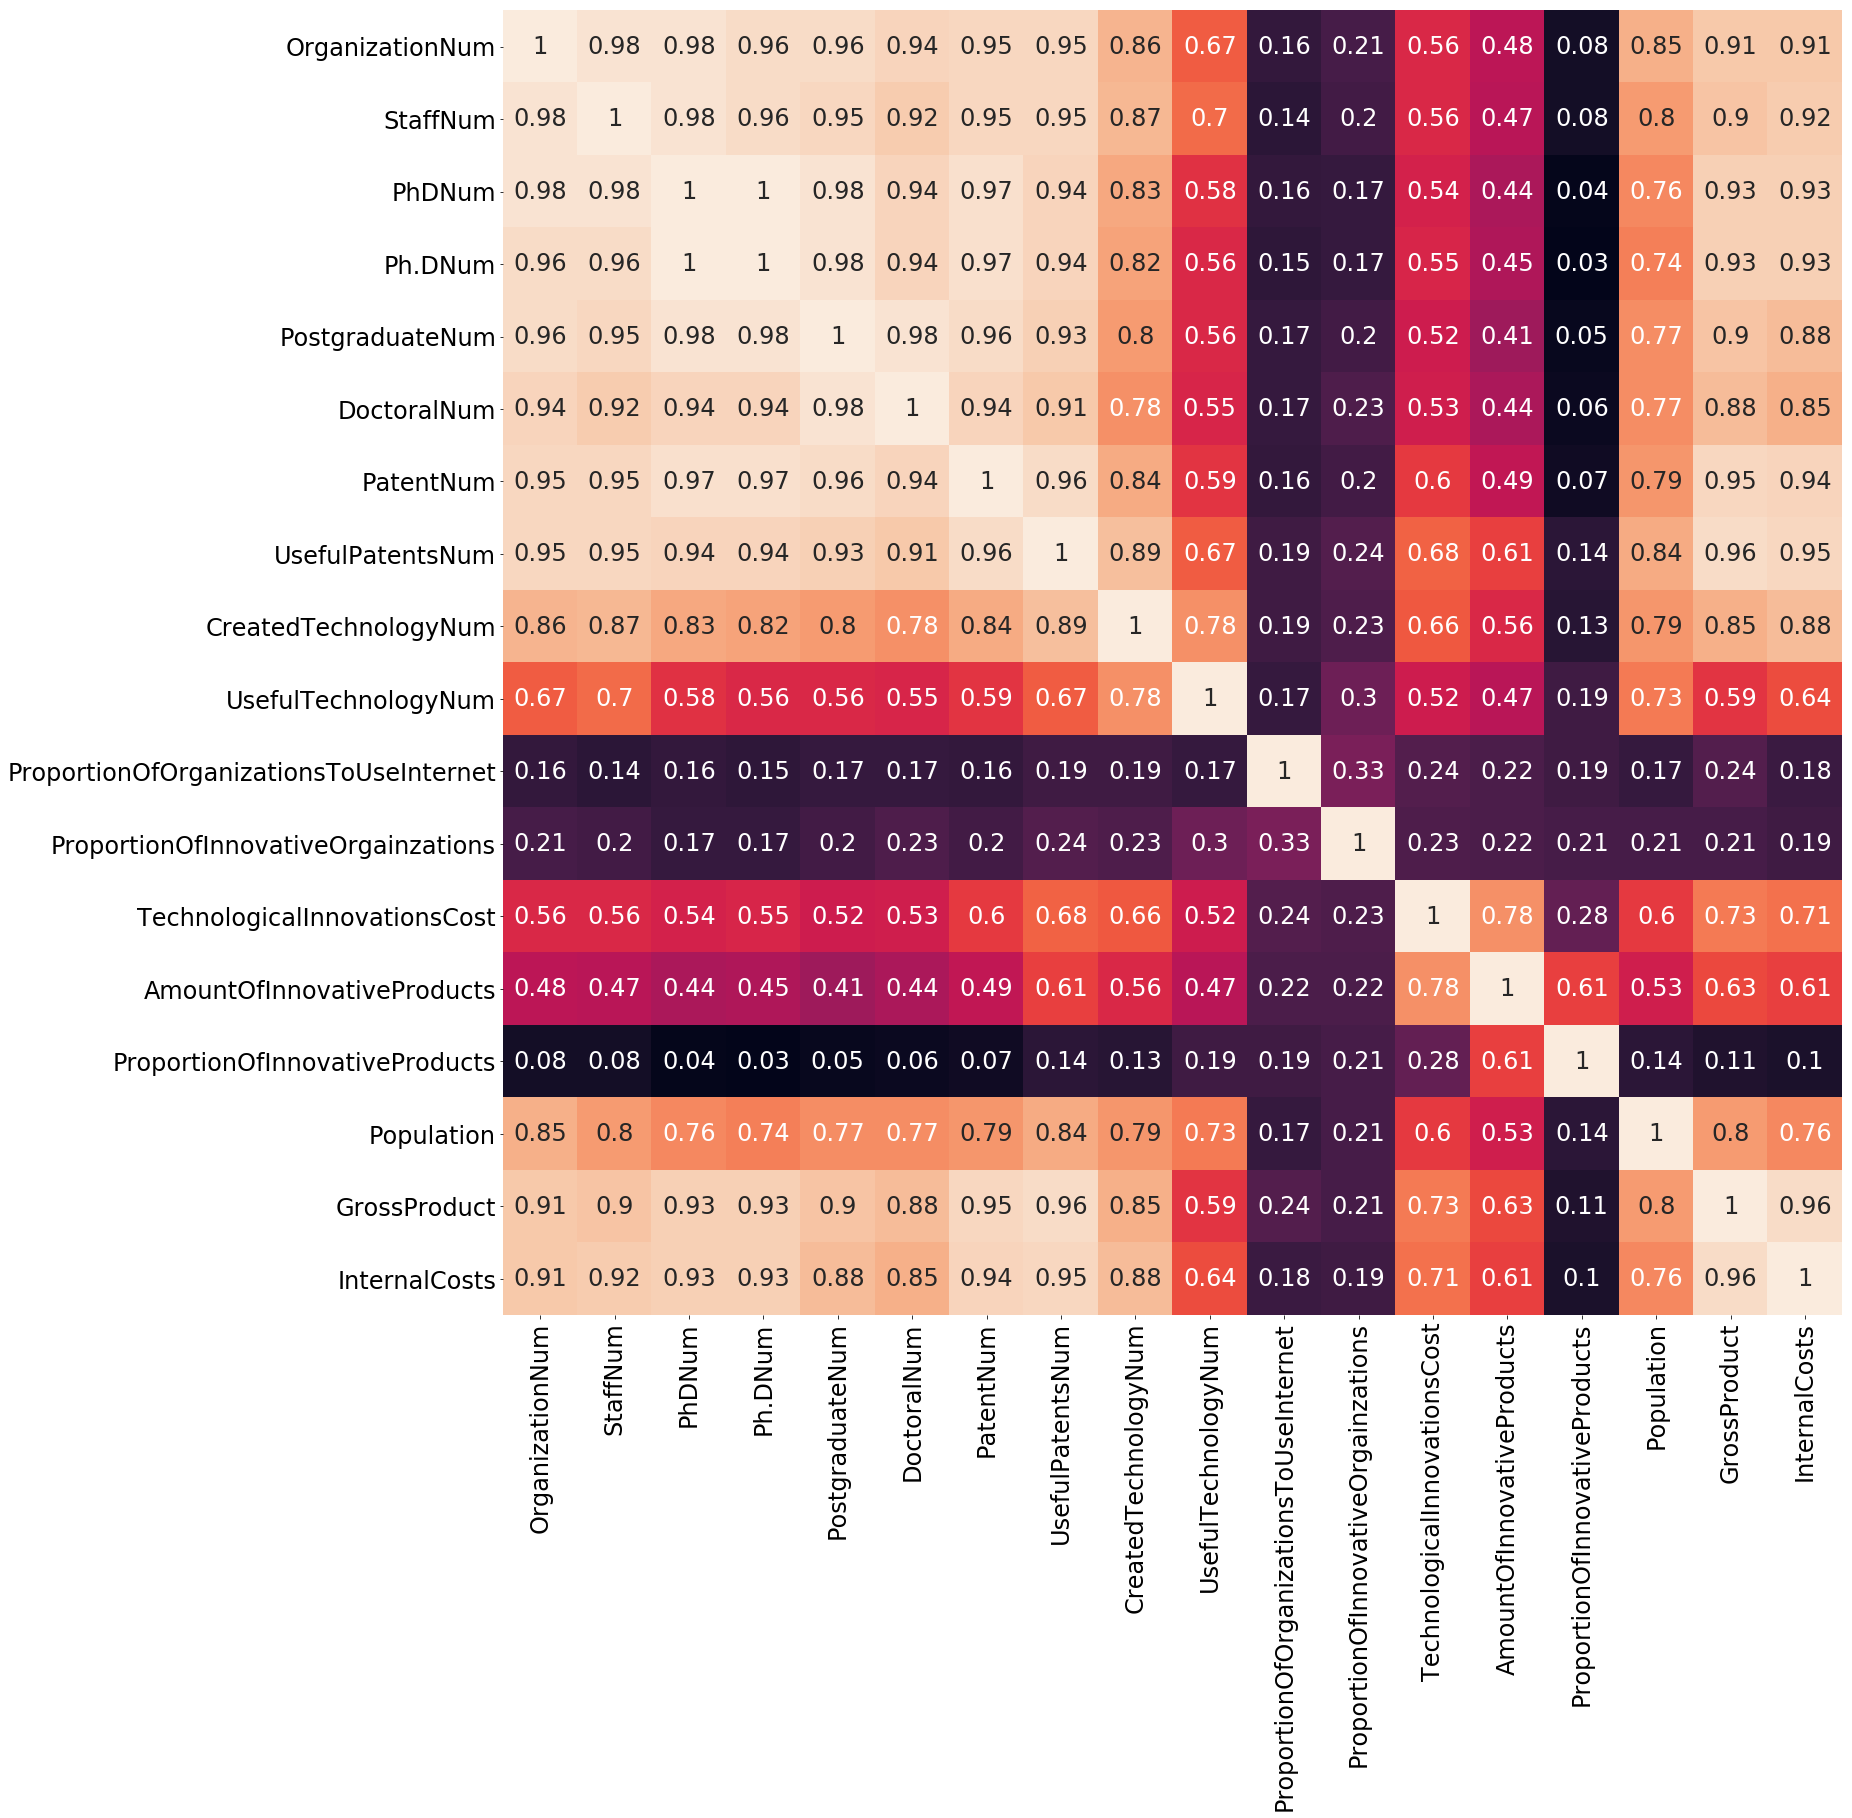

In [39]:
plt.figure(figsize=(24, 24))
heatmap_fig = sns.heatmap(scaled_with_dropped_regions_hier_concantenated_df.corr().round(2), annot=True, annot_kws={"size":24}, cbar=False)
for item in heatmap_fig.get_xticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_yticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_label():
    item.set_fontsize(24)

In [40]:
cross_corr_matrix = scaled_with_dropped_regions_hier_concantenated_df.corr()

Далее нам необходимо как то графически отобразить полученную в результате клстерризации информацию, для того что бы эти самые результаты хотя бы как нибудь понять. Мы можем для этого использовать полученную шагом ранее кроскореляционную матрицу выбрав наименее коррелирующие пары показателей. Но этот подход выявляет только линейные зависимости, и ктому же нам придётся самим как-то писать дополнительный программный код для автоматизации этого выбора (что довольно громоздко) либо выбирать пары вручную что трудно и времязатратно.
Попробуем применить другой подход. Воспользуемся тем что некоторые методы "обучения с учителем" (supervised learning) могут ранжировать признаки (features, столбцы) по степени важности. В частности таким свойством обладают методы основанные на объединении (ensemble) деревьев решений, например Random Forest. В каждом узле такого дерева присходит вычисление энтропии по Шеннону либо коэффициента Джинни, что автоматически даёт нам так же выявление нелинейных зависимостей. А разметка по классам необходимая для применения методов supervised learning у нас уже есть - принадлежность к тому или иному кластеру мы можем трактовать как принадлежность к соответтсвующему классу.

In [41]:
prepared_for_supevised_df = scaled_with_dropped_regions_hier_concantenated_df.copy()

In [42]:
prepared_for_supevised_df['cluster_class'] = labels

In [43]:
def report_best_score(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [44]:
param_dist = {"max_depth": [3, 7],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [45]:
clf = RandomForestClassifier(n_estimators=20)

In [46]:
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

In [47]:
start = time()
random_search.fit(prepared_df_values, labels)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report_best_score(random_search.cv_results_)

RandomizedSearchCV took 5.13 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.947 (std: 0.042)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.938 (std: 0.044)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.927 (std: 0.048)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 9, 'min_samples_split': 9}



In [48]:
param_grid = {"max_depth": [3, 7],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid)

In [49]:
start = time()
grid_search.fit(prepared_df_values, labels)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report_best_score(grid_search.cv_results_)

GridSearchCV took 56.74 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.953 (std: 0.044)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.952 (std: 0.017)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.951 (std: 0.012)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.951 (std: 0.045)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}



In [50]:
better_clf = RandomForestClassifier(n_estimators=20, bootstrap=True, criterion='entropy', max_depth=7, max_features=10, min_samples_leaf=1, min_samples_split=3)

In [51]:
better_clf.fit(prepared_df_values, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Feature ranking:
1. feature 10 (0.308647)
2. feature 11 (0.287735)
3. feature 13 (0.090897)
4. feature 7 (0.070505)
5. feature 14 (0.068920)
6. feature 1 (0.051917)
7. feature 9 (0.036286)
8. feature 0 (0.017149)
9. feature 6 (0.012221)
10. feature 16 (0.011642)
11. feature 2 (0.010347)
12. feature 5 (0.009002)
13. feature 4 (0.006795)
14. feature 15 (0.004617)
15. feature 12 (0.004213)
16. feature 17 (0.004123)
17. feature 8 (0.003127)
18. feature 3 (0.001855)


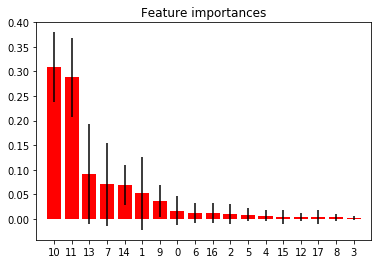

In [52]:
importances = better_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in better_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(prepared_df_values.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(prepared_df_values.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(prepared_df_values.shape[1]), indices)
plt.xlim([-1, prepared_df_values.shape[1]])
plt.show()


In [53]:
features = scaled_with_dropped_regions_hier_concantenated_df.columns

In [54]:
cmap = plt.cm.tab20
X = prepared_df_values
cluster_labels = ms.labels_

In [55]:
import clusters_drawer

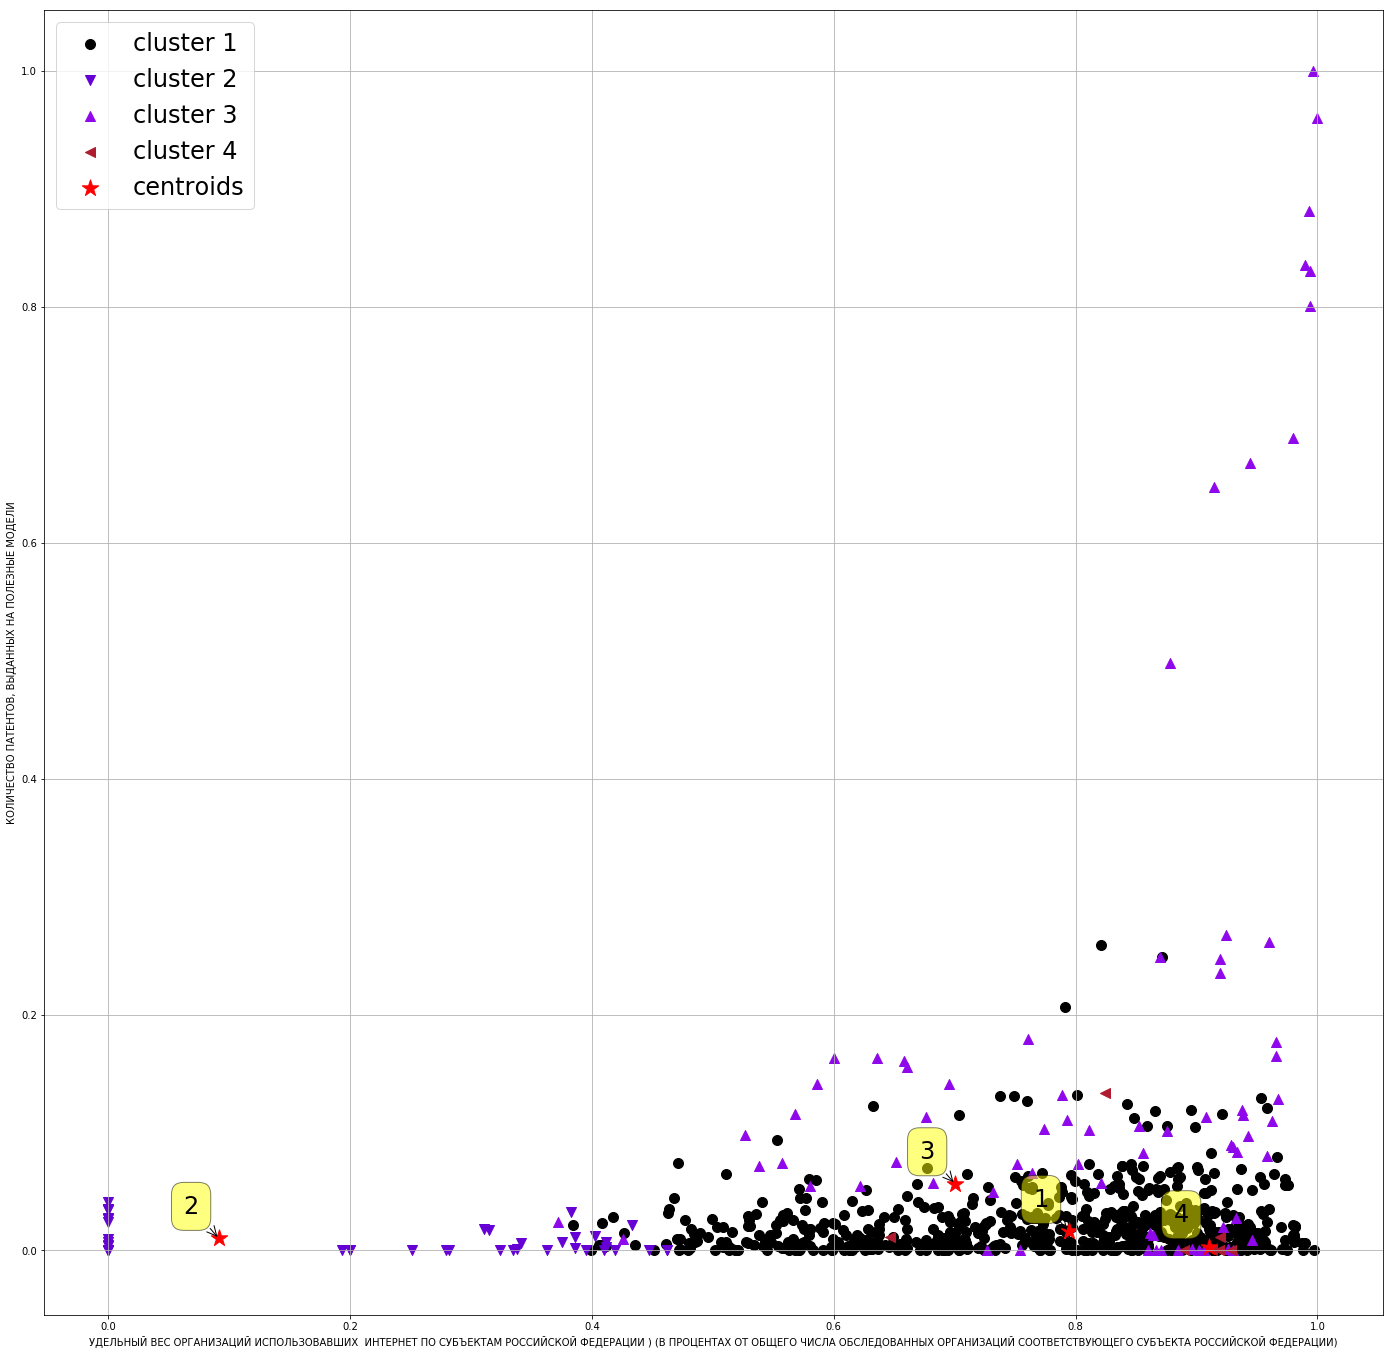

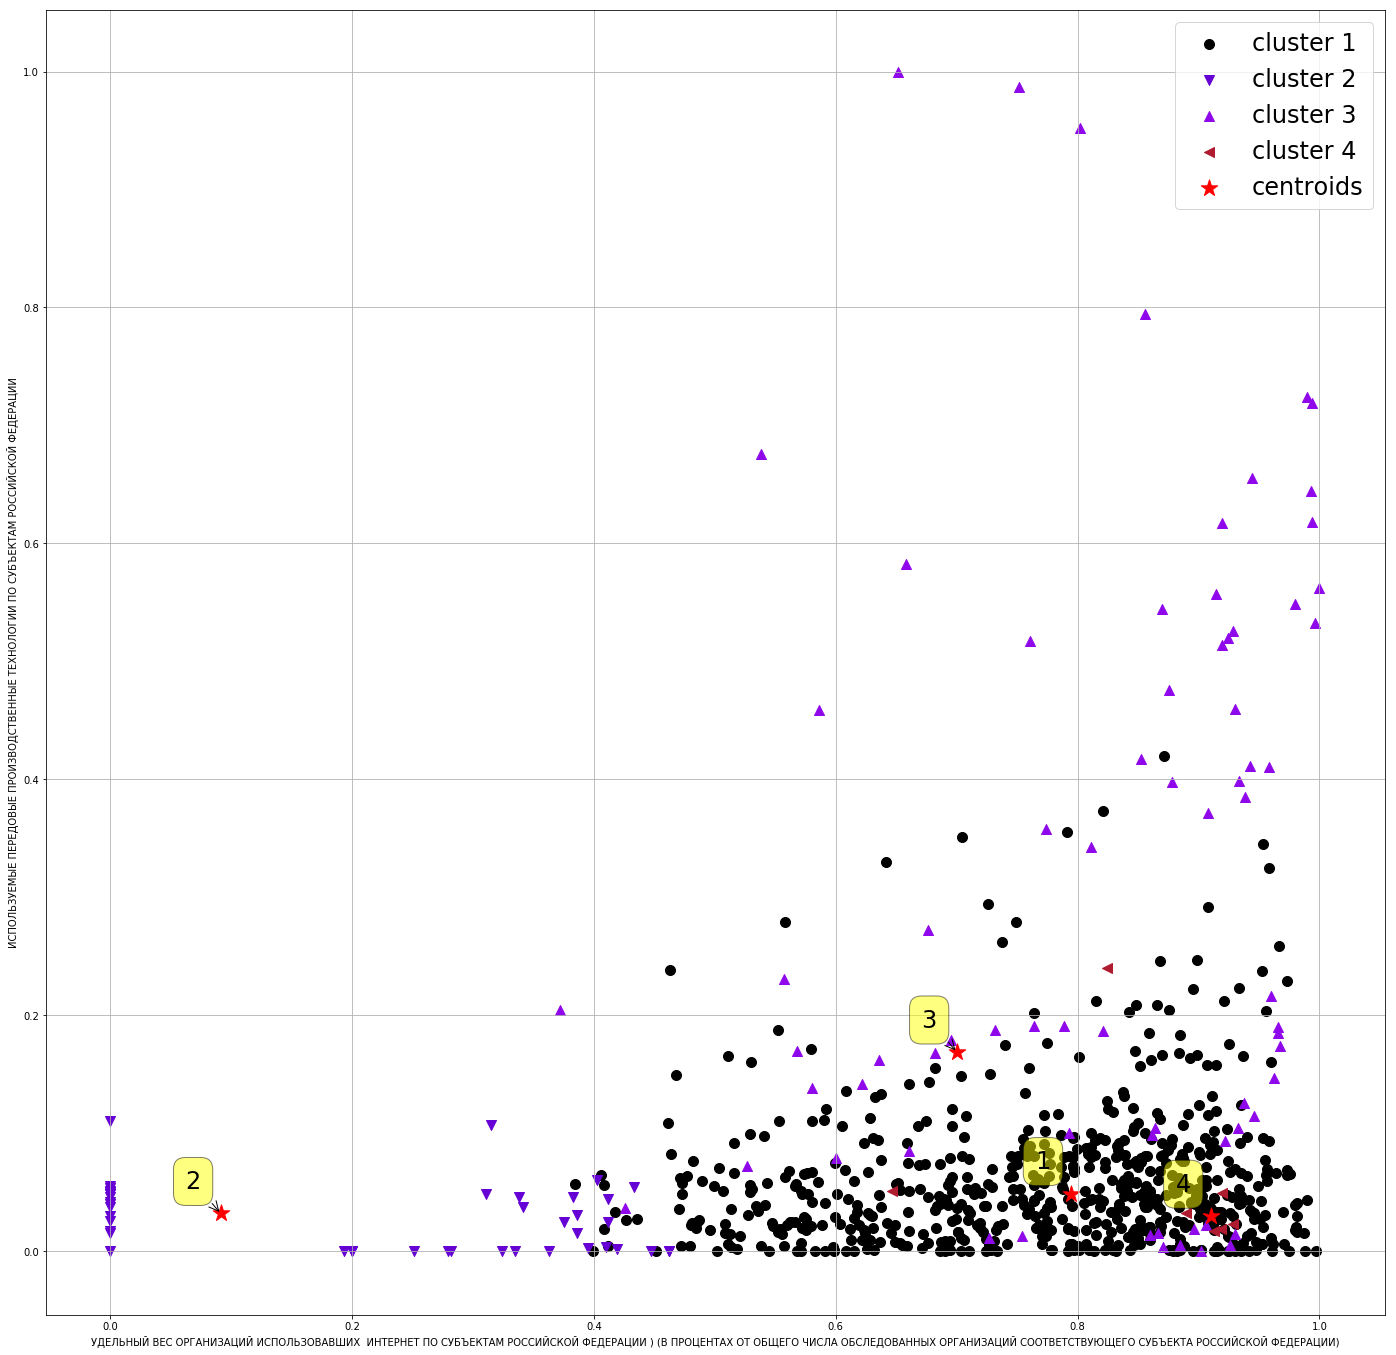

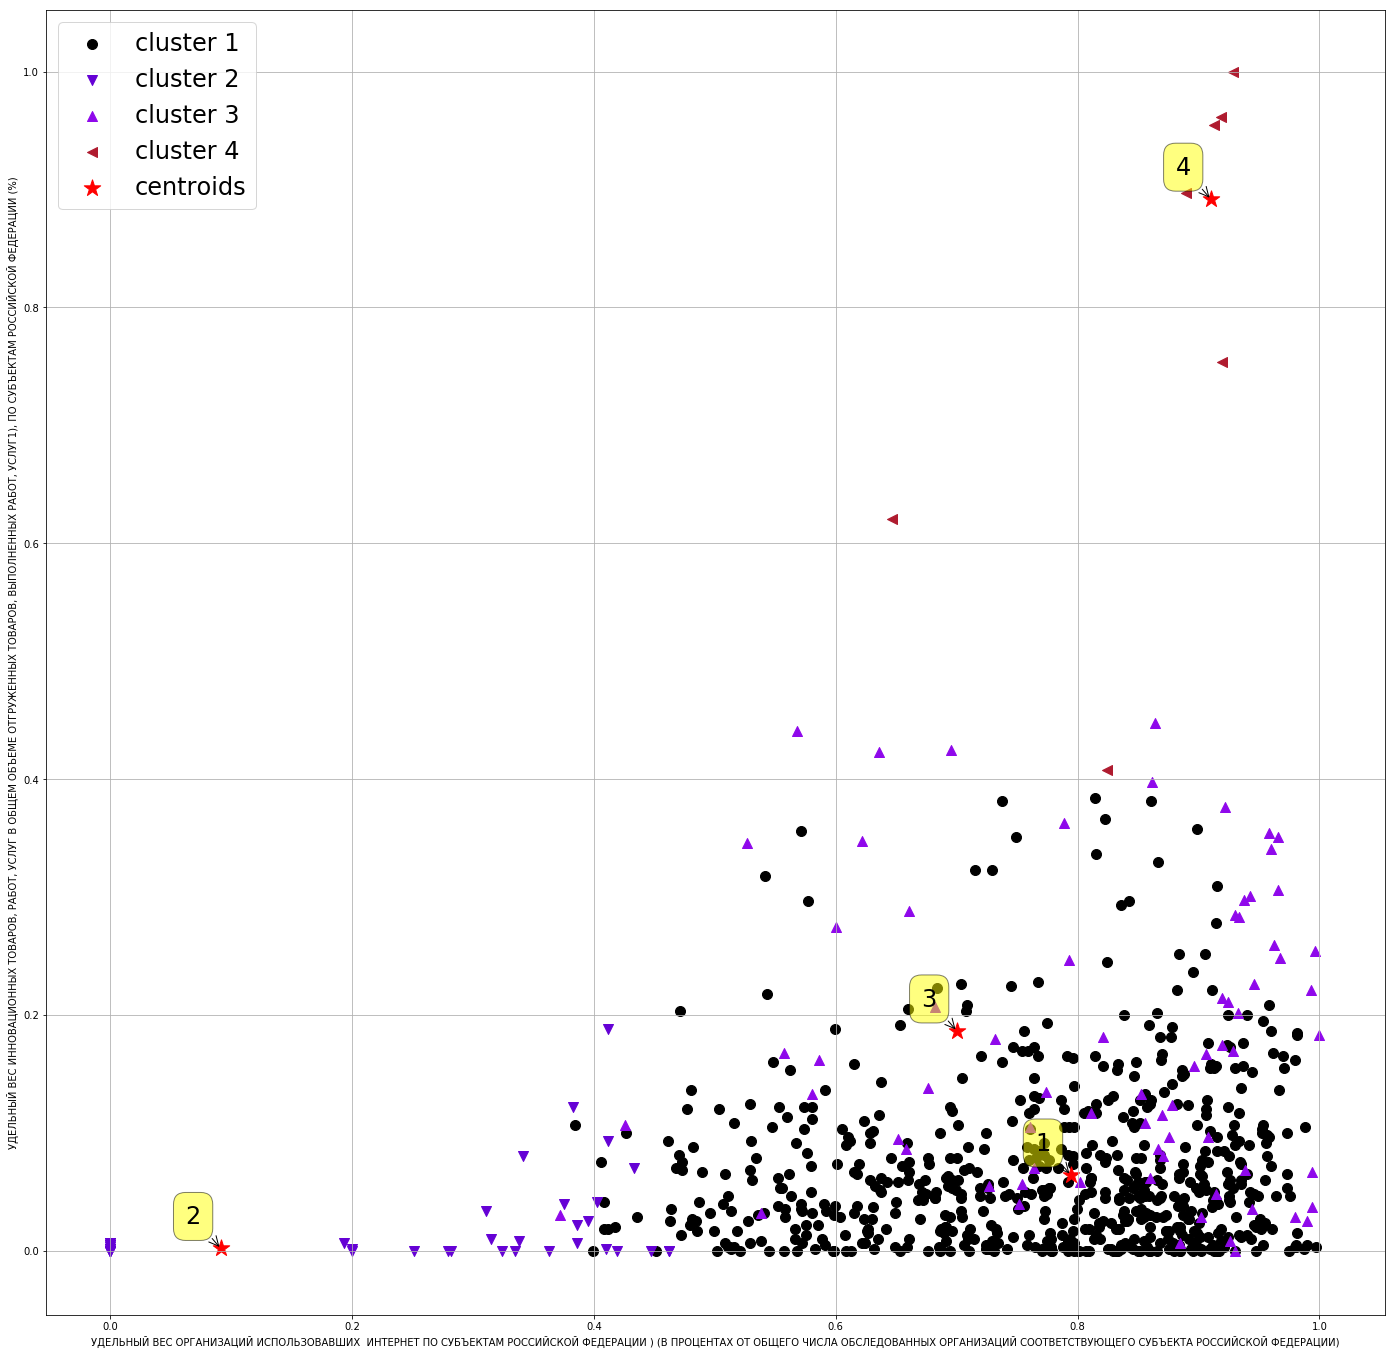

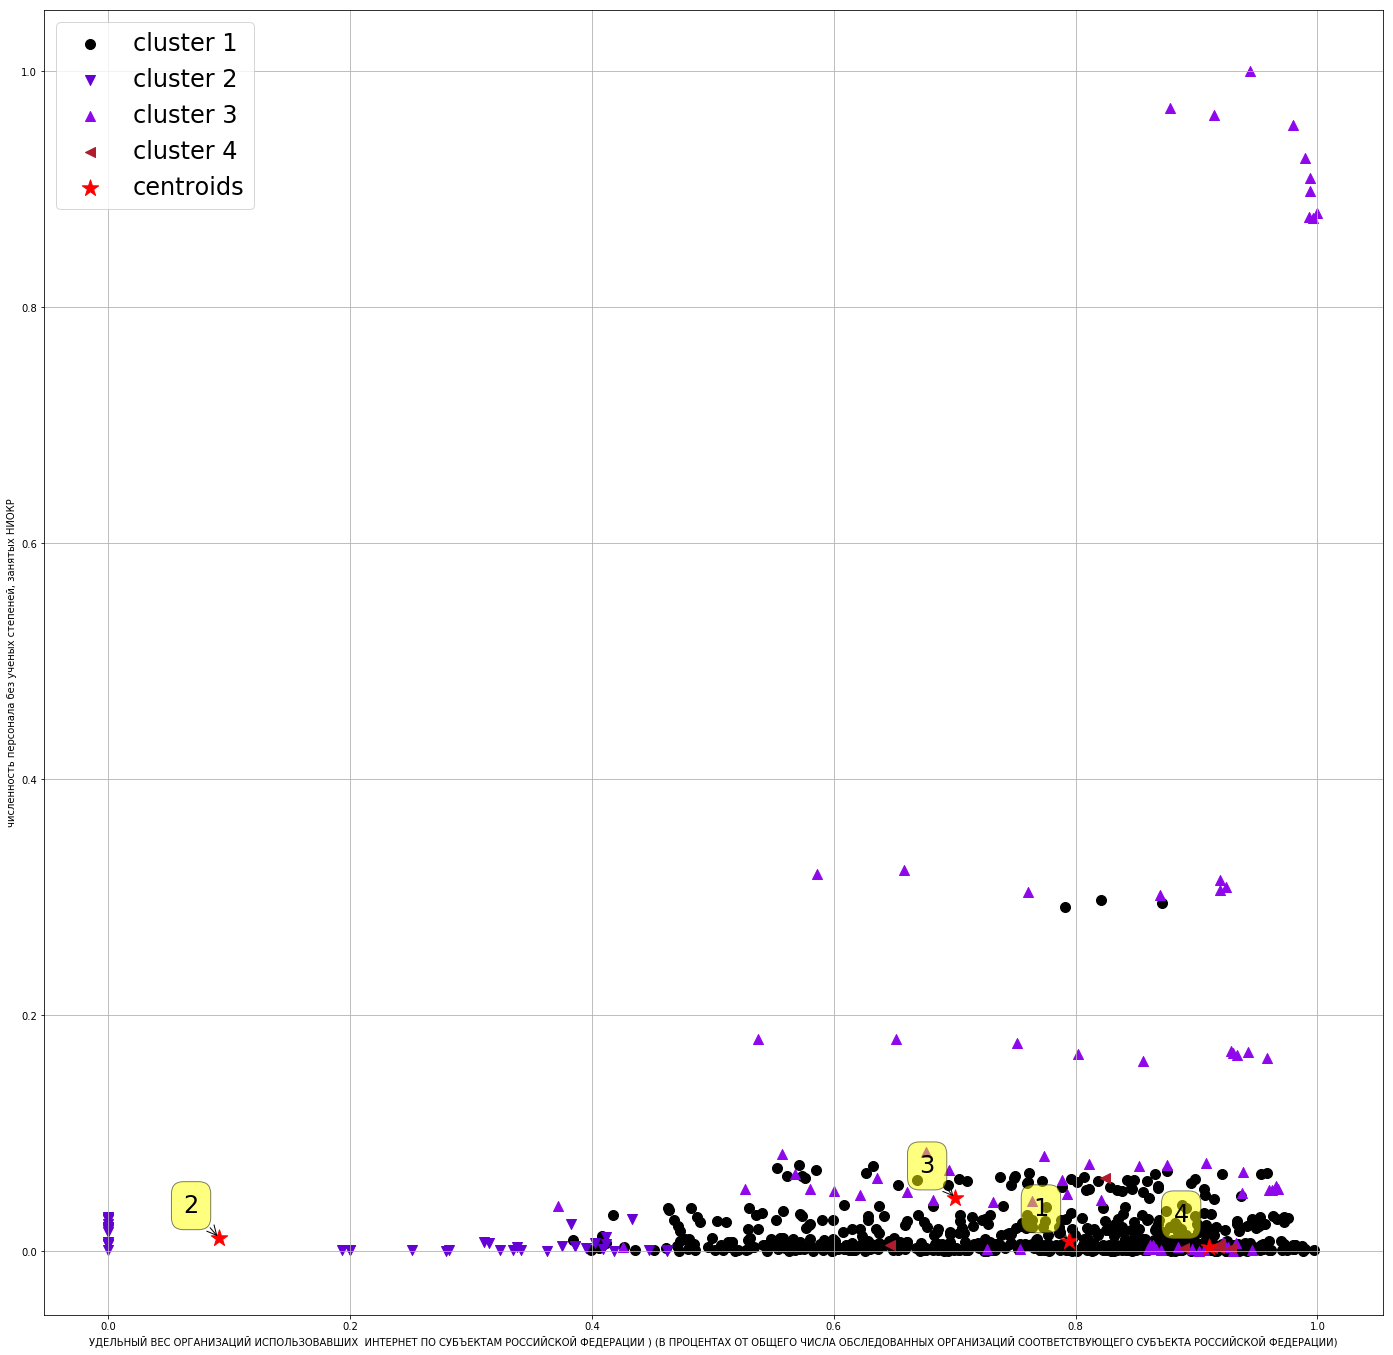

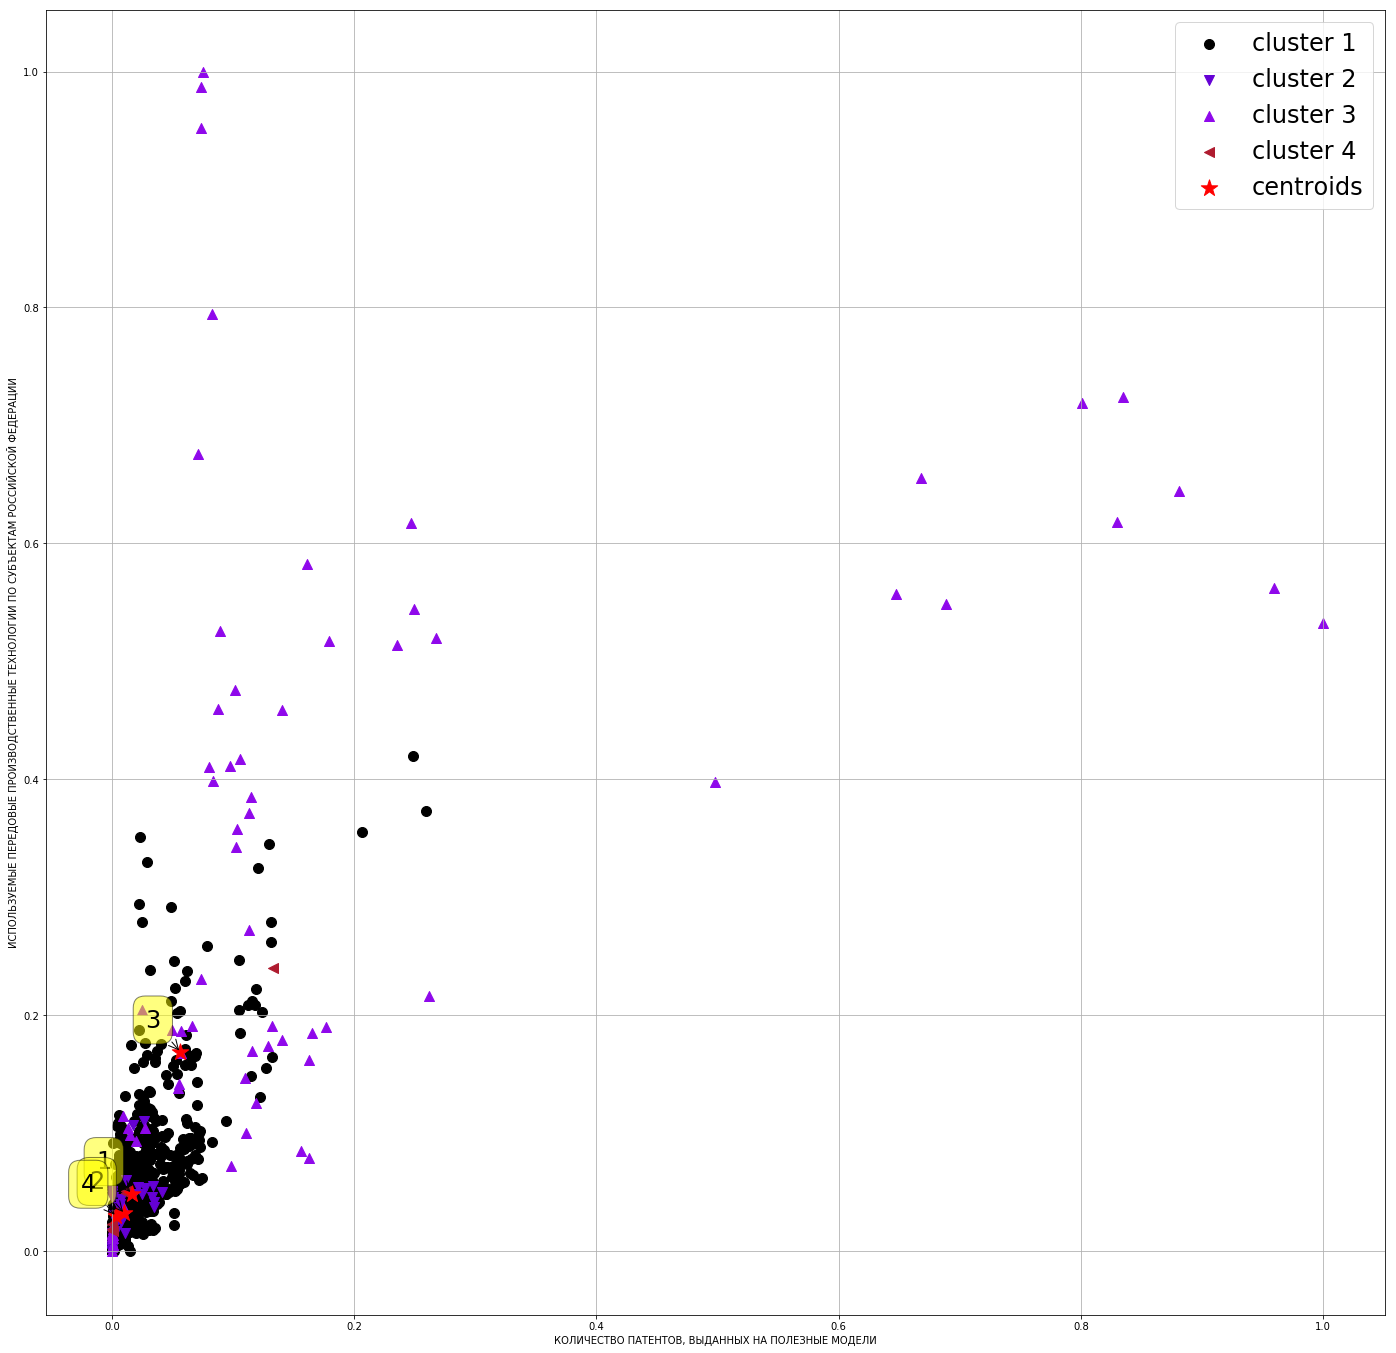

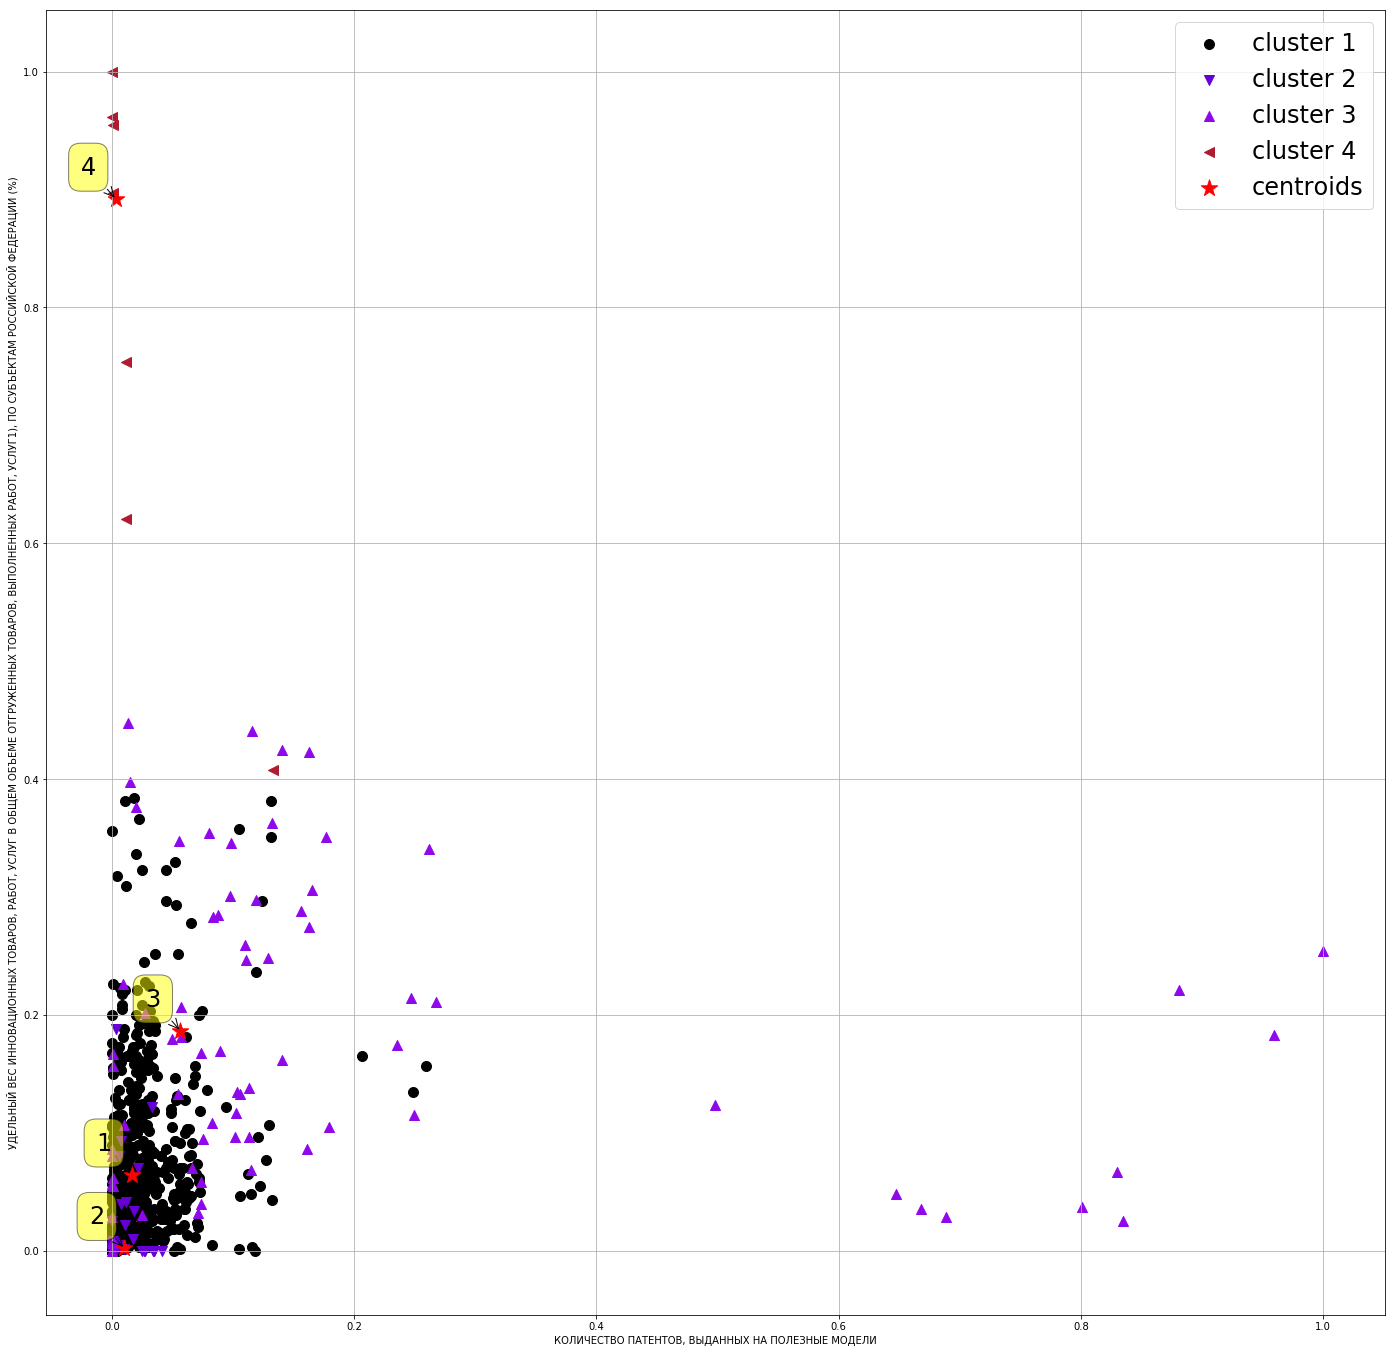

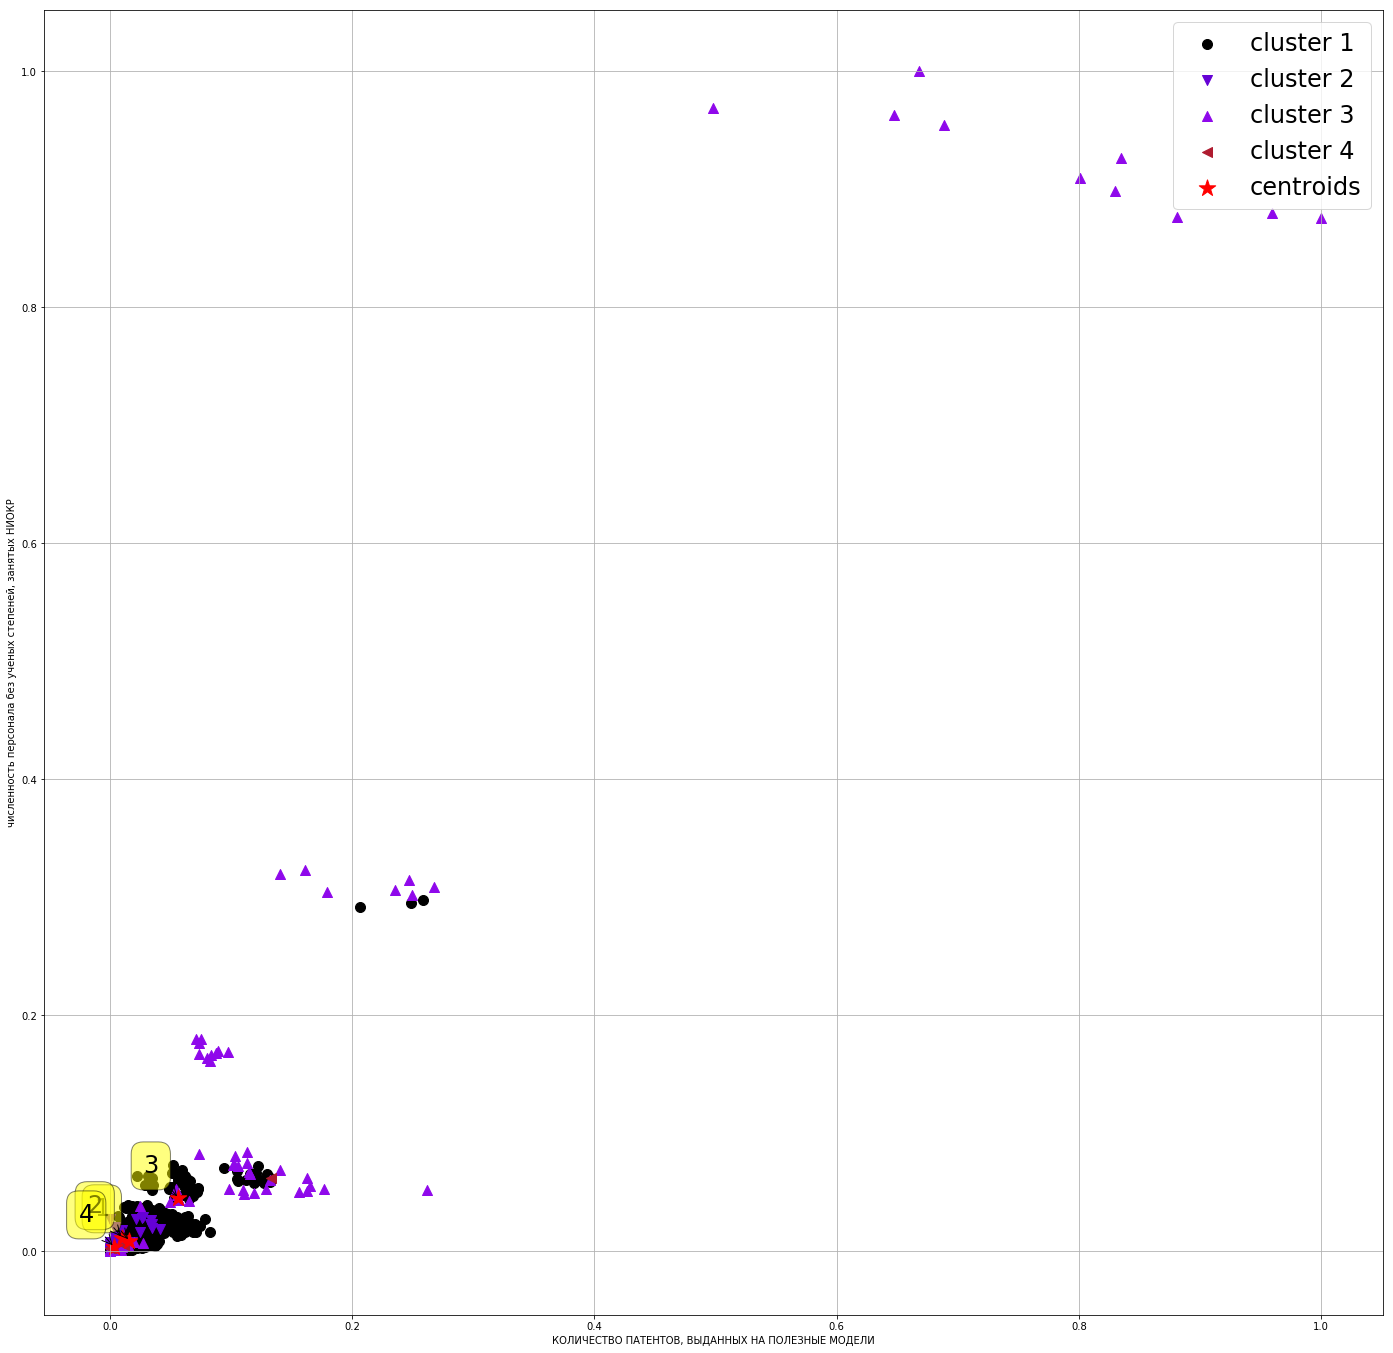

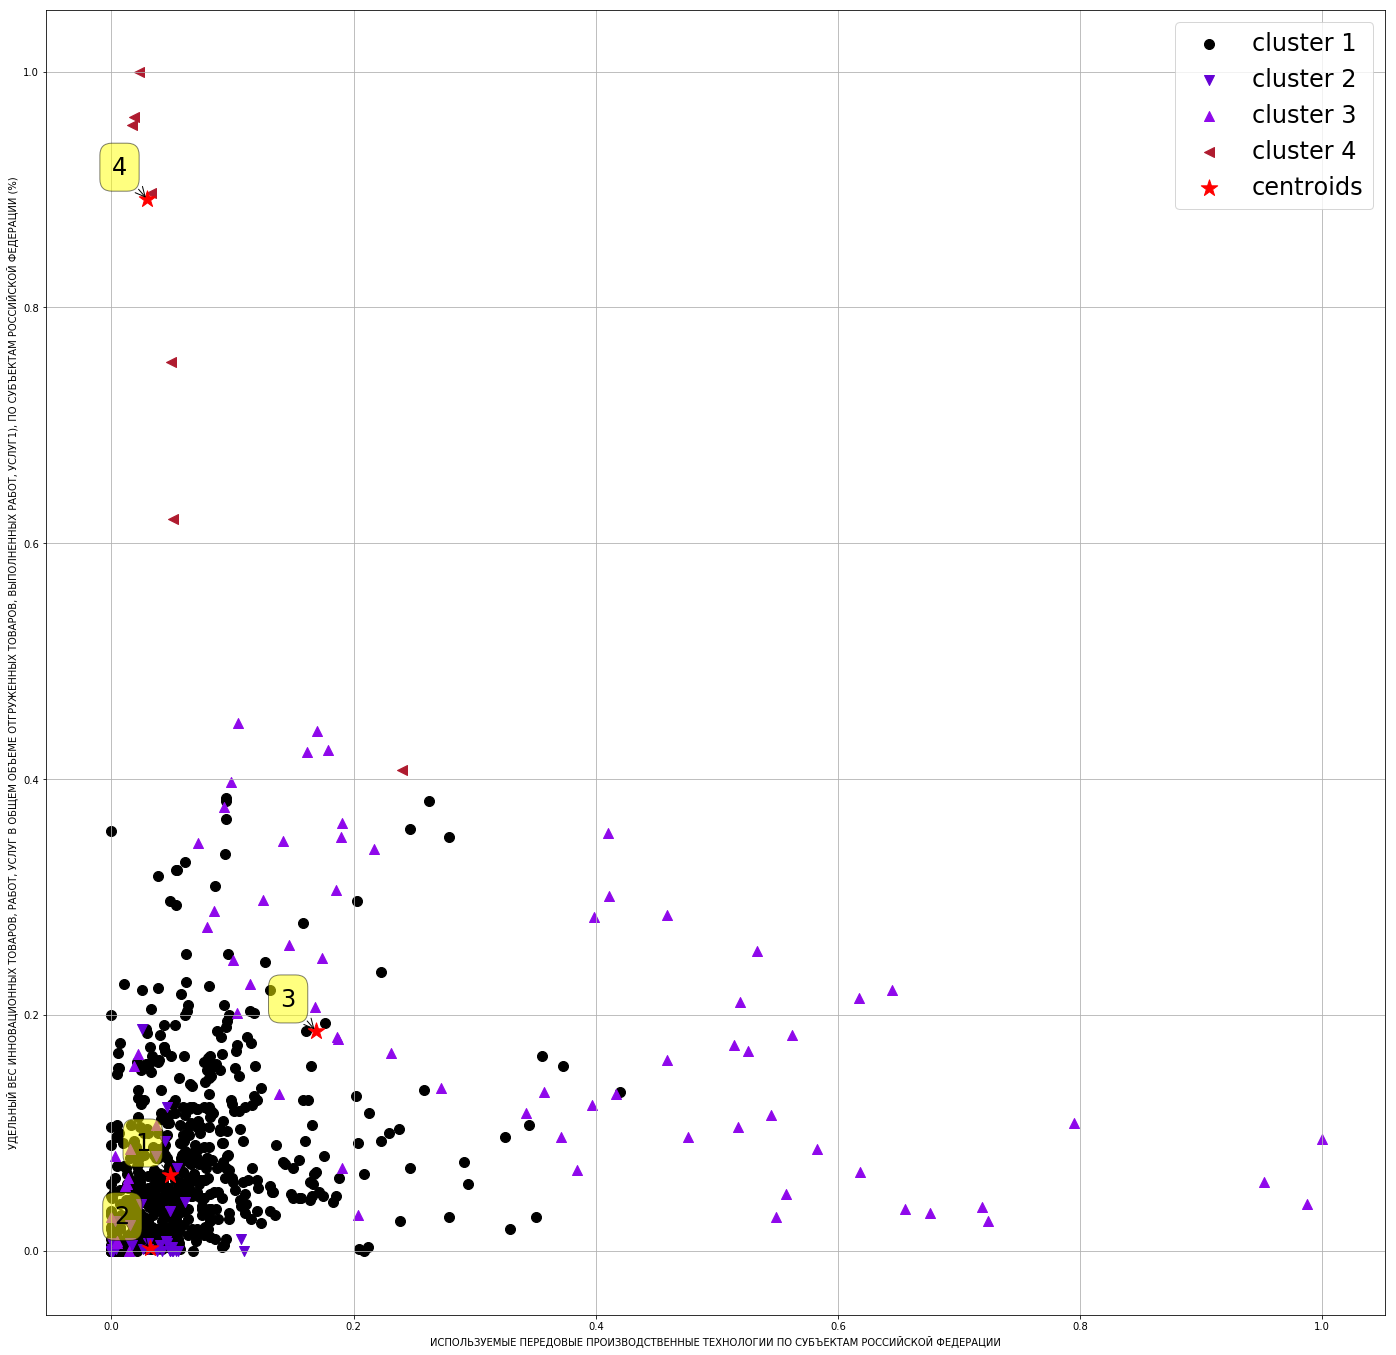

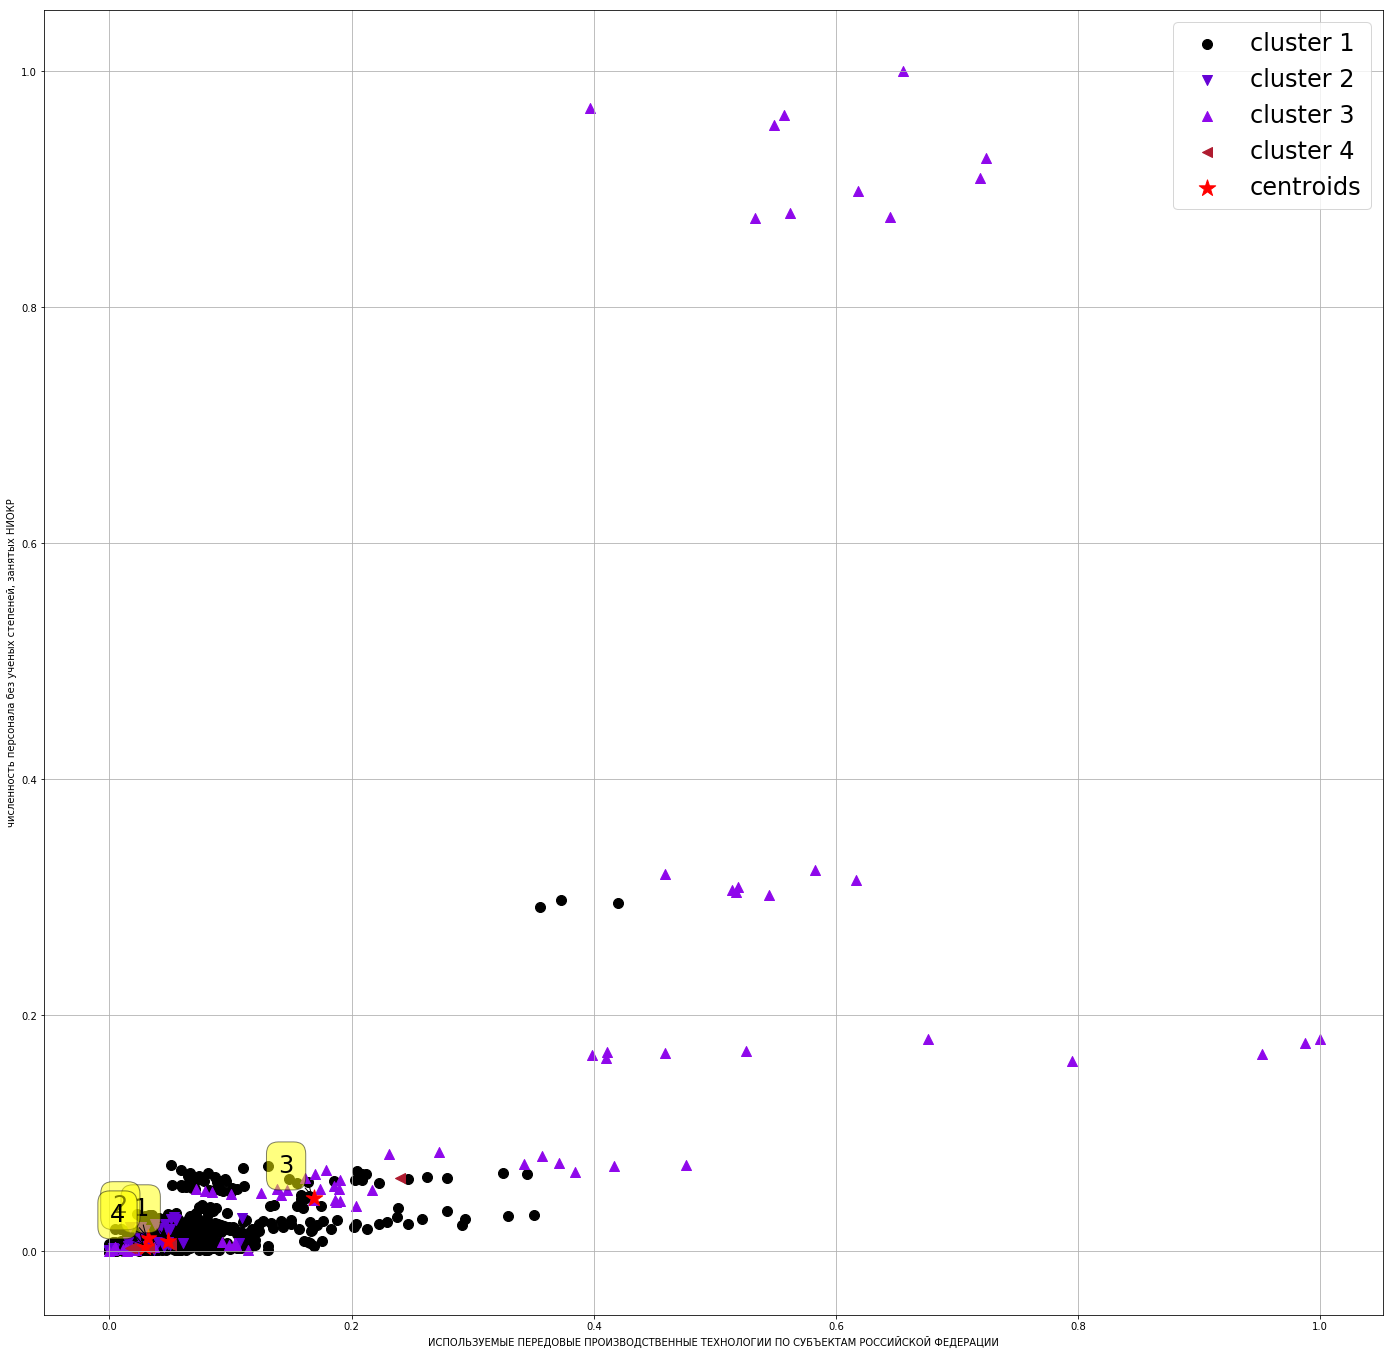

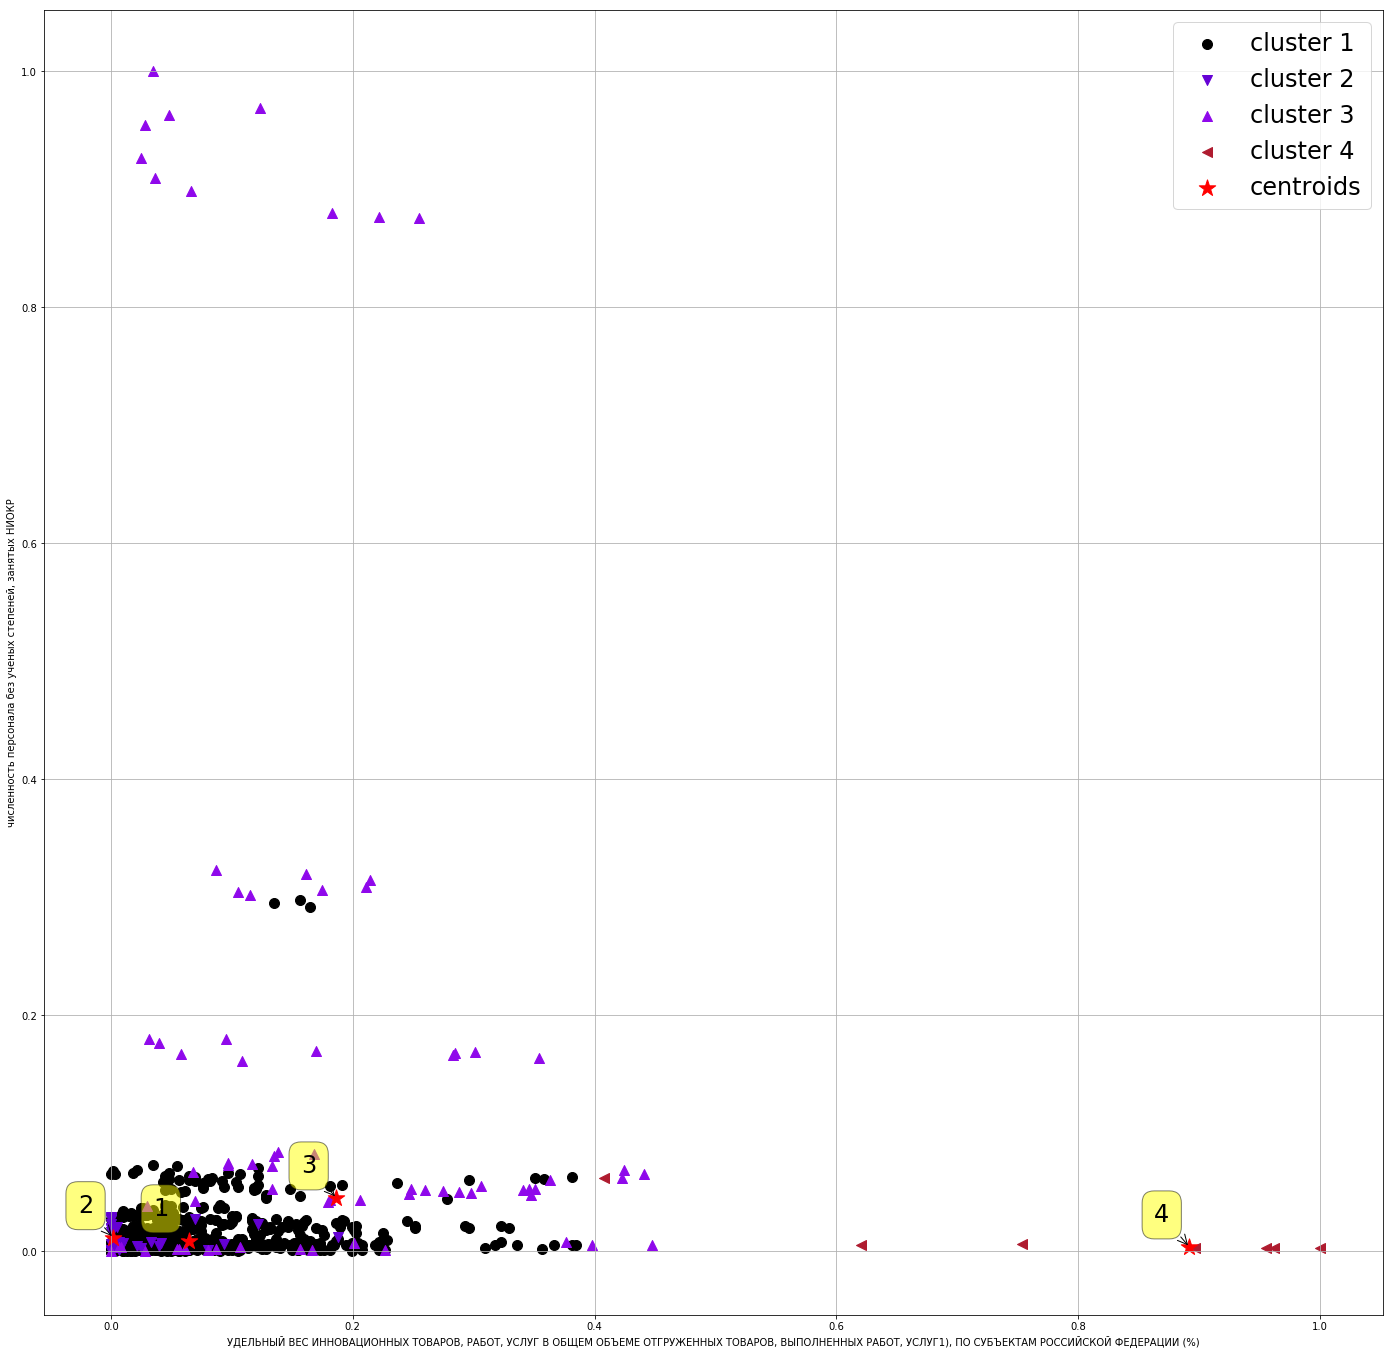

In [56]:
drawer = clusters_drawer.ClustersDrawer(
    plt,
    ms,
    X,
    (10, 7, 9, 14, 1),
    features_names=features_names_ru
)
drawer.data_point_size = 100
drawer.draw()

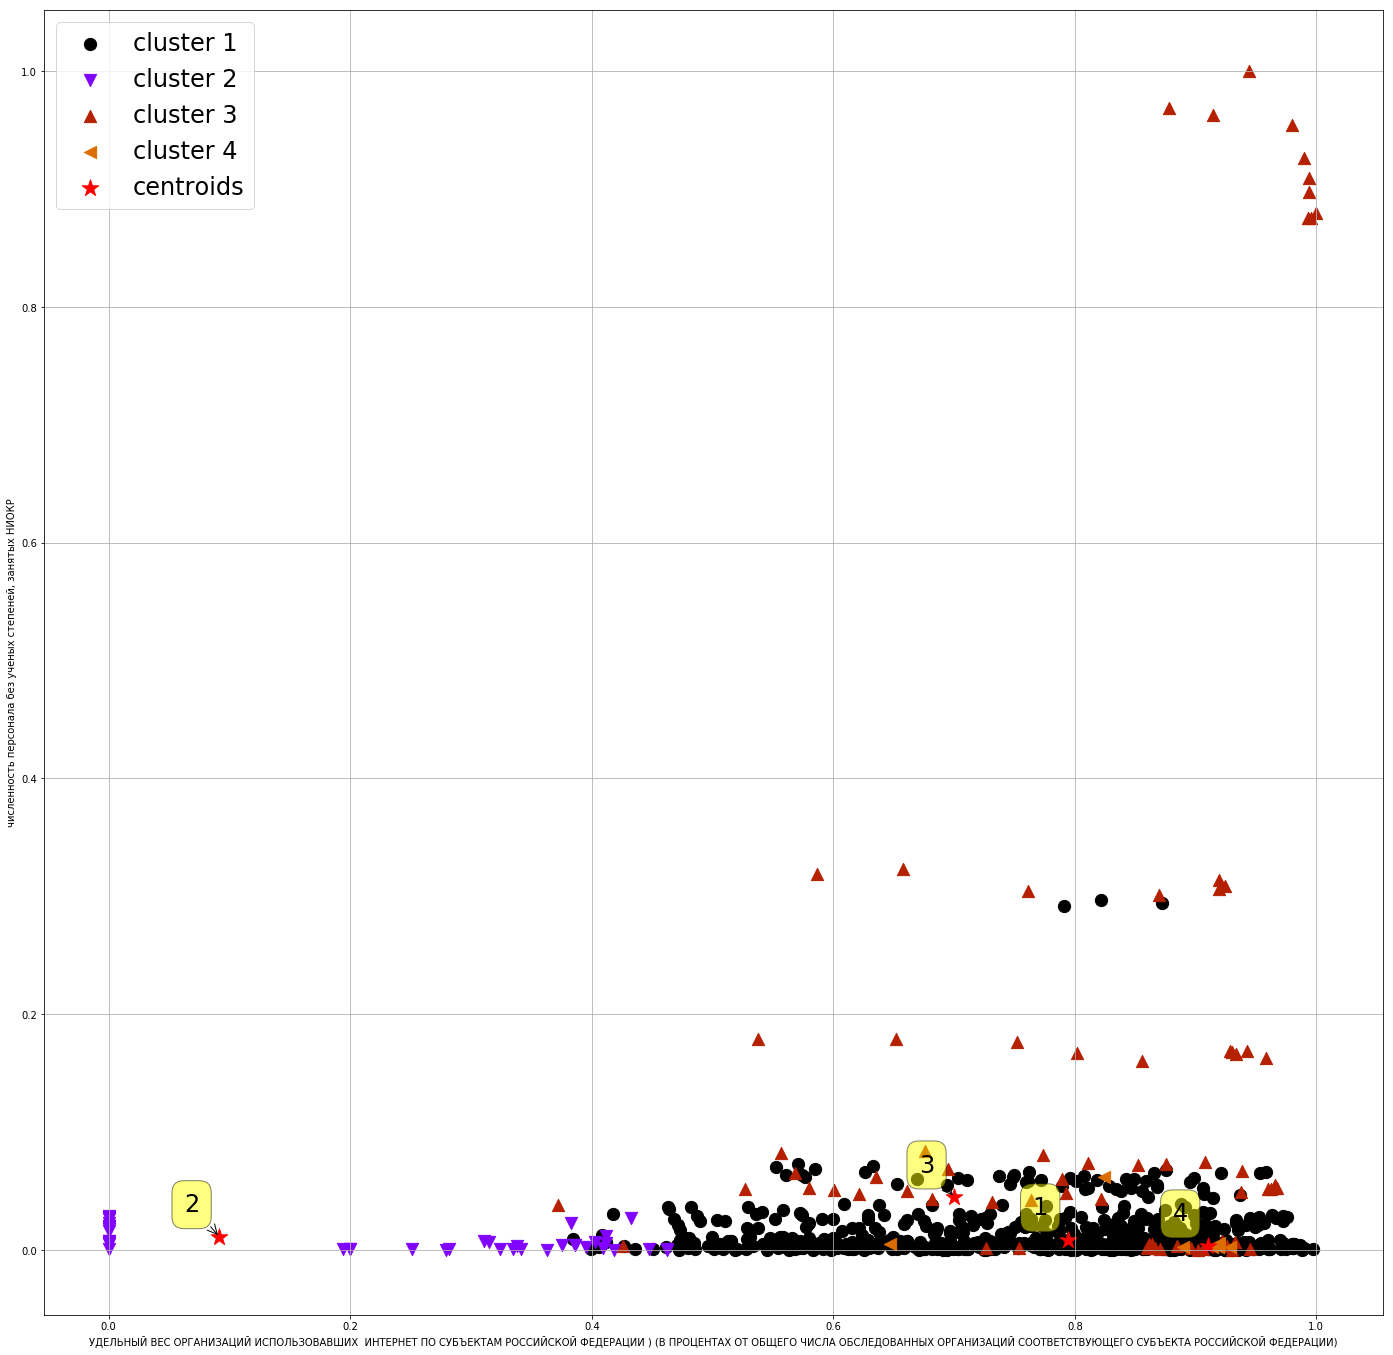

In [57]:
drawer = clusters_drawer.ClustersDrawer(plt, ms, X, (10, 1), features_names=features_names_ru)
drawer.data_point_size = 150
drawer.colormap = 'gnuplot'
drawer.colorstep = 64
drawer.draw()

In [58]:
drawer.colorstep

64

Следующие шаги:
1. Отрисовать все попарные проекции наиболее значимых features отобранных различными методами определения значимости (GradientBoosting, ExtraTreeClassifier).
2. Отрисовать графические представления кроскорреляционных матриц как описано здесь: https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/, и https://python-graph-gallery.com/111-custom-correlogram/.
3. Отрисовать кластеры регионов на карте регионов (по годам).
4. Попробовать обучить классификаторы (п.1) используя подмножества признаков отобранных по уровню значимости другими классификаторами.
5. Попробовать другие методы уменьшения размерности.
6. Другие методы кластеризации?
7. Интерпретация результатов.

In [59]:
hier_concatenated_df['cluster_label'] = ms.labels_

In [60]:
cluster1 = hier_concatenated_df.loc[hier_concatenated_df['cluster_label'] == 0]

In [61]:
clusters = [hier_concatenated_df.loc[hier_concatenated_df['cluster_label'] == i] for i in range(5)] 

In [62]:
region_codes_df = pd.read_csv('codes.csv', sep=';')
region_codes_with_names = region_codes_df.values

In [63]:
rus_adm_units = shapefile.Reader('unzip/RUS_adm1')

In [64]:
rus_adm_units_records = rus_adm_units.records()
rus_adm_units_shapes = rus_adm_units.shapes()

In [65]:
region_map_names = [record[10] if record[10] else 'Москва' for record in rus_adm_units_records]

In [66]:
cutted_name_part = ('край', 'область', 'республика', 'аок', 'аоб', '', '(якутия)', 'респу', 'респуб', '(горсовет)', 'автономный', 'автономная', 'округ', 'респу́блика')
def extract_main_name_part(name):
    lower_case_name = name.lower()
    splitted_name = lower_case_name.split(' ')
    main_name_part_components = []
    for name_part in splitted_name:
        if name_part not in cutted_name_part:
            main_name_part_components.append(name_part)
    return ' '.join(main_name_part_components)

In [67]:
region_map_names_main_part = [extract_main_name_part(name) for name in region_map_names]
#region_codes_names_main_part = [[extract_main_name_part(record[0]), record[1]] for record in region_codes_values]
region_codes_names_main_part = [extract_main_name_part(record[0]) for record in region_codes_with_names]
region_codes = [record[1]  for record in region_codes_with_names]

In [68]:
def fix_names(region_names):
    sverdlovsk_count = 0
    fixed_names = []
    for name in region_names:
        if name == 'калинингpадская':
            fixed_names.append('калининградская')
        elif name == 'ингуше́тия':
            fixed_names.append('ингушетия')
        elif name == 'свердловская':
            sverdlovsk_count += 1
            if sverdlovsk_count == 3:
                fixed_names.append('свердловск')
            else:
                fixed_names.append(name)
        else:
            fixed_names.append(name)
    return fixed_names

def fix_names(region_names):
    #sverdlovsk_count = 0
    fixed_names = []
    for name in region_names:
        if name == 'калинингpадская':
            fixed_names.append('калининградская')
        elif name == 'ингуше́тия':
            fixed_names.append('ингушетия')
        else:
            fixed_names.append(name)
    return fixed_names

In [69]:
fixed_region_map_names_main_part = fix_names(region_map_names_main_part)
fixed_regions_codes_names_main_part = fix_names(region_codes_names_main_part)

In [70]:
region_names_from_dataset = merged_df_list[-1]['Region'].tolist()

In [71]:
region_names_from_dataset_main_part = [extract_main_name_part(name) for name in region_names_from_dataset]

In [72]:
fixed_region_names_from_dataset_main_part = fix_names(region_names_from_dataset_main_part)

In [73]:
def correct_names_from_unit_map(region_names):
    corrected_region_names = []
    for region_name in region_names:
        if region_name == 'пермская':
            corrected_region_names.append('пермский')
        elif region_name == 'камчатская':
            corrected_region_names.append('камчатский')
        elif region_name == 'чечено-ингушска':
            corrected_region_names.append('чеченская')
        elif region_name == 'eврейская':
            corrected_region_names.append('еврейская')
        elif region_name == 'карачаево-черкесская':
            corrected_region_names.append('карачаево-черкессия')
        elif region_name == 'ханты-мансийский - югра':
            corrected_region_names.append('ханты-мансийский')
        elif region_name == 'северная осетия - алания':
            corrected_region_names.append('северная осетия')
        else:
            corrected_region_names.append(region_name)
    return corrected_region_names

In [74]:
corrected_region_map_names_main_part = correct_names_from_unit_map(fixed_region_map_names_main_part)
corrected_regions_codes_names_main_part = correct_names_from_unit_map(fixed_regions_codes_names_main_part)
region_codes_description = [(code, name_main_part, None) for code, name_main_part in zip(
    region_codes,
    corrected_regions_codes_names_main_part
)]
print(region_codes_description)

[('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', None), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG', 'волгоградская', None), ('ROS', 'росто

In [75]:
map_codes_indexes_bijection = {}
for i, region_map_name_main_part in enumerate(corrected_region_map_names_main_part):
    for j, region_code_name_main_part in enumerate(corrected_regions_codes_names_main_part):
        if region_map_name_main_part == region_code_name_main_part:
            map_codes_indexes_bijection[i] = j
            break

In [76]:
def decompose_clusters_by_years(clusters, years):
    return {year: [cluster.loc[year]['Region'] for cluster in clusters] for year in years}

In [77]:
years = range(2005, 2015)

In [78]:
clusters_by_years = decompose_clusters_by_years(clusters, years)

In [79]:
def extract_sign_part_clustered_names(clusters_by_years):
    sign_names_part = {}
    #print(clusters_by_years)
    for year, clustered_names_list in clusters_by_years.items():
        main_names_parts = [
            [
                extract_main_name_part(name)
                for name in clustered_names
            ]
            for clustered_names in clustered_names_list
        ]
        sign_names_part[year] = [
            fix_names(main_names_parts_cluster)
            for main_names_parts_cluster in main_names_parts
        ]
    return sign_names_part

In [80]:
clustered_sign_names_parts = extract_sign_part_clustered_names(
    clusters_by_years
)

In [81]:
def find_cluster_map_indexes(
        year_clustered_sign_names_parts,
        corrected_region_names_main_part
    ):
    year_cluster_indexes = []
    year_cluster_names = []
    for i, name in enumerate(corrected_region_names_main_part):
        if name in year_clustered_sign_names_parts:
            year_cluster_indexes.append(i)
            year_cluster_names.append(name)
    return year_cluster_indexes

In [82]:
def clustered_names_to_map_indexes(
        years,
        clustered_sign_names_parts,
        corrected_region_map_names_main_part
    ):
    clustered_map_indexes = {}
    for year in years:
        clustered_map_indexes[year] = [
            find_cluster_map_indexes(
                year_clustered_sign_names_parts,
                corrected_region_map_names_main_part
            ) for year_clustered_sign_names_parts in clustered_sign_names_parts[year]
        ]
    return clustered_map_indexes

In [83]:
clustered_map_indexes = clustered_names_to_map_indexes(
        years,
        clustered_sign_names_parts,
        corrected_region_map_names_main_part
    )

In [84]:
def calculate_code_coords(region_shape_num, adm_units_shapes, region_code_description):
    bbox = adm_units_shapes[region_shape_num].bbox
    len_x = abs(bbox[2] - bbox[0])
    len_y = abs(bbox[3] - bbox[1])
    if len_x > len_y:
        min_bbox_len = len_y
    else:
        min_bbox_len = len_x
    if min_bbox_len > 12:
        fsize = 18
    elif min_bbox_len > 8 and min_bbox_len <= 12:
        fsize = 16
    elif min_bbox_len > 4 and min_bbox_len <= 8:
        fsize = 12
    elif min_bbox_len > 1 and min_bbox_len <= 4:
        fsize = 10
    else:
        fsize = 10
    if region_code_description[2] != None:
        print(region_code_description)
        if region_code_description[2][2]:
            return region_code_description
        else:
            return region_code_description[2][0], region_code_description[2][1], fsize
    else:
        x_bbox_centre = (bbox[0] + bbox[2]) / 2
        y_bbox_centre = (bbox[1] + bbox[3]) / 2
        return x_bbox_centre, y_bbox_centre, fsize

In [85]:
codes_coords_table = {
    'ARK': (45.0, 65.0, None),
    'CAO': (175, 68.98645782470703, None)
}
def set_codes_coords(region_codes_description):
    new_region_codes_description = []
    for region_code_description in region_codes_description:
        new_region_codes_description.append(
            (
                region_code_description[0],
                region_code_description[1],
                codes_coords_table.get(region_code_description[0])
            )
        )
    return new_region_codes_description

In [86]:
region_codes_description = set_codes_coords(region_codes_description)

In [87]:
def draw_clustered_regions(
        year_clustered_map_indexes,
        map_codes_indexes_bijection,
        region_codes,
        cluster_colors,
        adm_units_shapes
    ):
    print("region_codes: ", region_codes)
    num_of_shapes = len(adm_units_shapes)
    fig = plt.figure(figsize=(24, 12))
    ax = fig.add_subplot(111)
    list_of_pathes_list = []
    non_clustered_index_set = list(range(num_of_shapes))
    non_clustred_pathes_list = []
    for cluster_map_indexes, cluster_color in zip(year_clustered_map_indexes, cluster_colors):
        clustered_index_set = []
        text_xy_list_mean = []
        text_xy_list_bbox = []
        text_xy_list = []
        codes = []
        for shape_num in non_clustered_index_set:
            cluster_pathes_list = []
            region_code_description = region_codes[map_codes_indexes_bijection[shape_num]]
            points = np.array(adm_units_shapes[shape_num].points)
            #x_m_centre = points[:, 0].mean()
            #y_m_centre = points[:, 1].mean()
            #text_xy_list_mean.append((x_m_centre, y_m_centre))
            #bbox = adm_units_shapes[shape_num].bbox
            #x_bbox_centre = (bbox[0] + bbox[2]) / 2
            #y_bbox_centre = (bbox[1] + bbox[3]) / 2
            #text_xy_list_bbox.append((x_bbox_centre, y_bbox_centre))
            text_x, text_y, fsize = calculate_code_coords(shape_num, adm_units_shapes, region_code_description)
            print(region_code_description[0], region_code_description[1], (text_x, text_y), fsize)
            text_xy_list.append((text_x, text_y, fsize))
            codes.append(region_code_description)
            parts = adm_units_shapes[shape_num].parts
            par = list(parts) + [points.shape[0]]
            for point_i_j in range(len(parts)):
                if shape_num in cluster_map_indexes:
                    polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]])
                    cluster_pathes_list.append(polygon)
                    if shape_num not in clustered_index_set:
                        clustered_index_set.append(shape_num)

            list_of_pathes_list.append(cluster_pathes_list)
            cluster_collection = collections.PatchCollection(cluster_pathes_list, edgecolor='black', linewidths=1.0)
            cluster_array = cluster_collection.get_array()
            cluster_collection.set_facecolor(cluster_color)
            ax.add_collection(cluster_collection)
            
        for text_xy, code in zip(text_xy_list, codes):
            ax.text(text_xy[0], text_xy[1], code[0], size=text_xy[2], color='red')
        print("clustered_index_set: ", clustered_index_set)
        print("non_clustered_index_set before delete: ", non_clustered_index_set)
        for i in clustered_index_set:
            if i in non_clustered_index_set:
                non_clustered_index_set.remove(i)
        print("non_clustered_index_set after delete: ", non_clustered_index_set)
                
                
    pathes_list = []
    text_xy_list = []
    codes = []
    print("non_clustered_index_set:\n", non_clustered_index_set)
    for shape_num in non_clustered_index_set:
        region_code_description = region_codes[map_codes_indexes_bijection[shape_num]]
        #codes.append(region_codes[map_codes_indexes_bijection[shape_num]])
        codes.append(region_code_description)
        points = np.array(adm_units_shapes[shape_num].points)
        text_x, text_y, fsize = calculate_code_coords(shape_num, adm_units_shapes, region_code_description)
        text_xy_list.append((text_x, text_y, fsize))        
        parts = adm_units_shapes[shape_num].parts
        par = list(parts) + [points.shape[0]]
        for point_i_j in range(len(parts)):
            polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]], label=str(shape_num))
            pathes_list.append(polygon)
    non_clustered_collection = collections.PatchCollection(pathes_list, edgecolor='black', linewidths=2.0)
    non_clustered_collection.set_facecolor('purple')
    ax.add_collection(non_clustered_collection)

    for text_xy, code in zip(text_xy_list, codes):
        ax.text(text_xy[0], text_xy[1], code[0], size=text_xy[2], color='gray')    
    ax.set_xlim(10, +190)
    ax.set_ylim(40, 84)
    #plt.legend()
    plt.show()

Год:  2005
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

BRY брянская (33.26635169982923, 52.9399681091309) 10
BUR бурятия (107.78960037231451, 53.595333099365305) 12
CHE чеченская (45.7733478546142, 43.22849655151373) 10
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
ING ингушетия (44.94737625122078, 43.09981918334963) 10
IVA ивановская (41.643217086792276, 57.026172637939474) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
KAM калмыкия (44.62885856628432, 46.499729156494205) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
KIR кировская (50.11251449584976, 58.58652877807618) 12
KOS костромская (44.02028274536129, 58.449003219604535) 10
KUR курганская (65.30985260009766, 55.52977371215826) 10
KUR курская (36.368535995483555, 51.71346092224134) 10
MOR мордовия (44.45628166198742, 54.418930053711016) 10
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ 

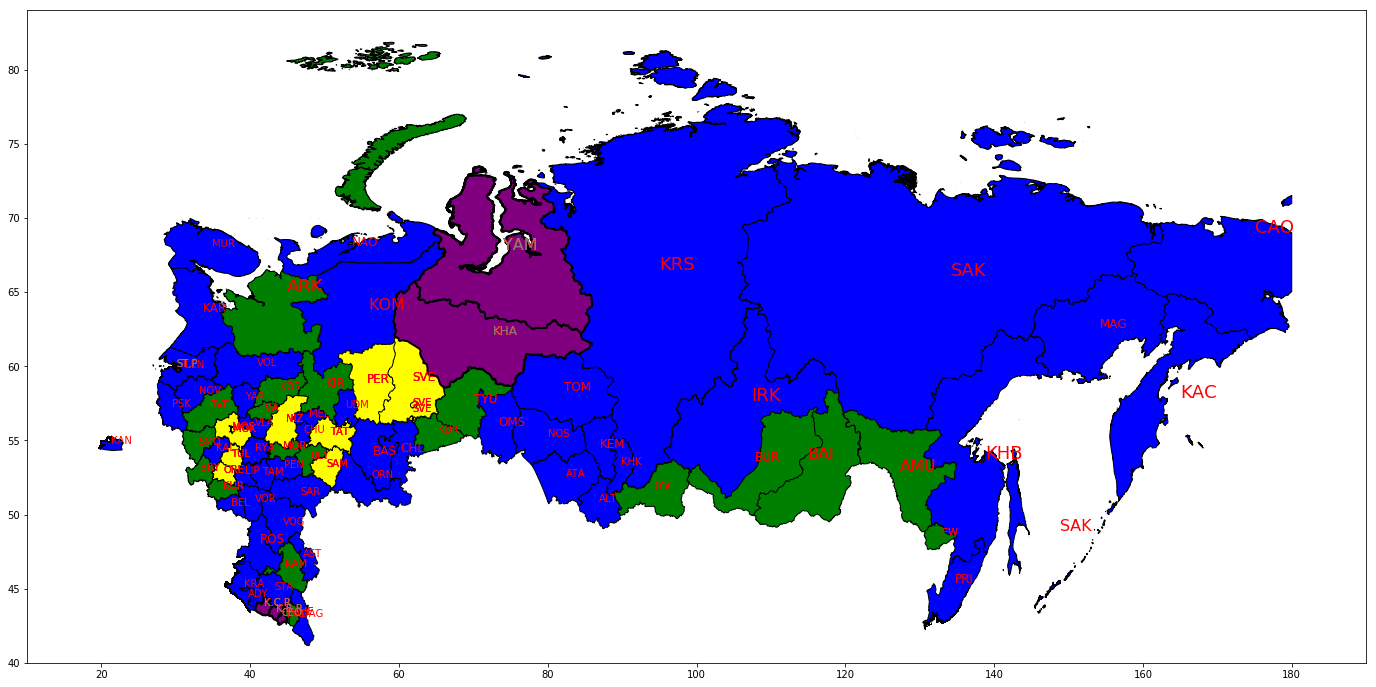

Год:  2006
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
CHE чеченская (45.7733478546142, 43.22849655151373) 10
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
ING ингушетия (44.94737625122078, 43.09981918334963) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
KAM калмыкия (44.62885856628432, 46.499729156494205) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
KIR кировская (50.11251449584976, 58.58652877807618) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
PER пермский (55.63559722900409, 58.9062690734864) 12
SAM самарская (50.27296638488773, 53.23889160156259) 10
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.787879

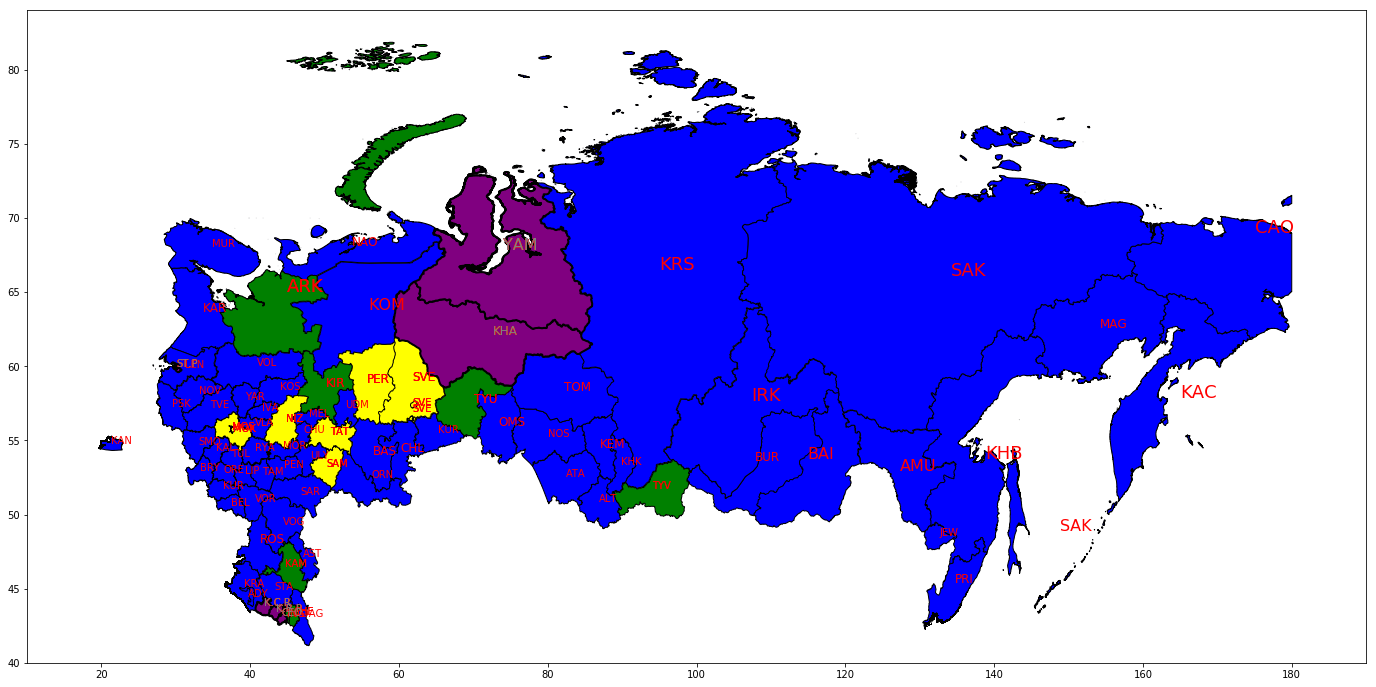

Год:  2007
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

CHE чеченская (45.7733478546142, 43.22849655151373) 10
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
ING ингушетия (44.94737625122078, 43.09981918334963) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MOR мордовия (44.45628166198742, 54.418930053711016) 10
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
PER пермский (55.63559722900409, 58.9062690734864) 12
SAM самарская (50.27296638488773, 53.23889160156259) 10
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.7878799438476, 56.929761886596694) 10
SVE свердловская (61.728816986084034, 59.02750587463381) 12
TAT татарстан (50.74247741699237, 55.376993

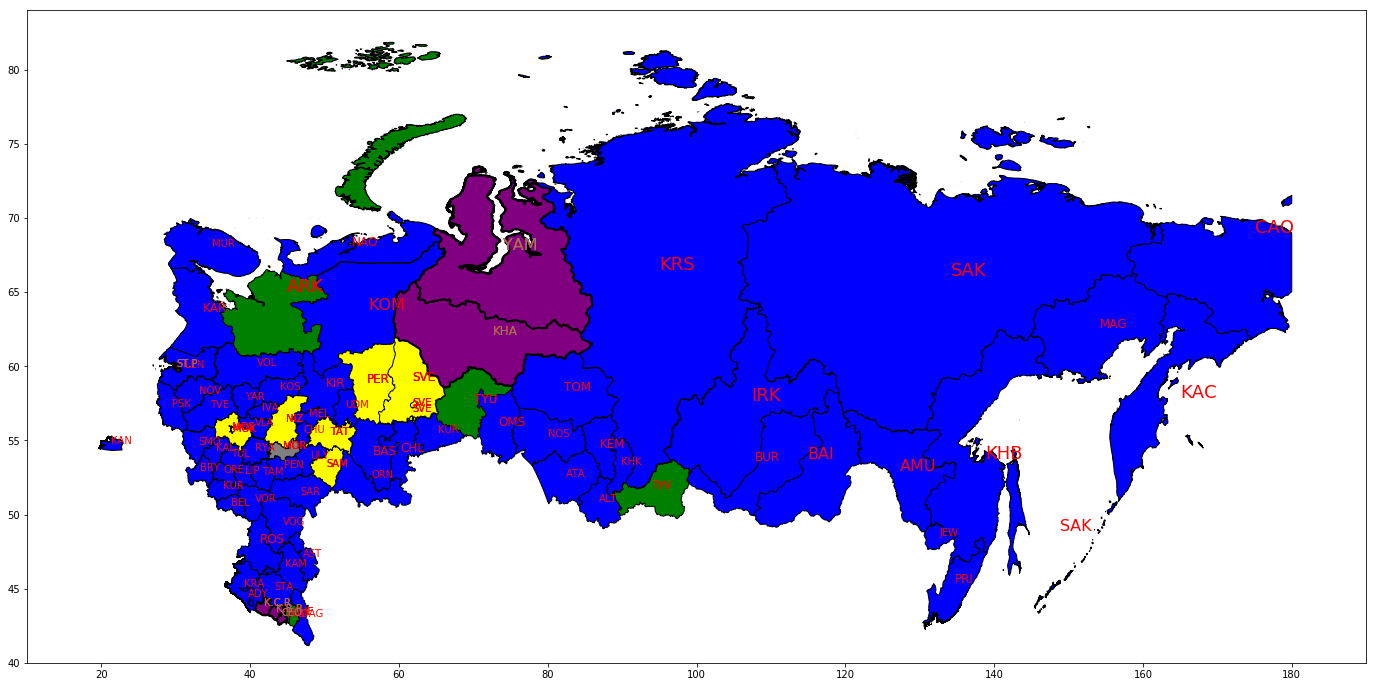

Год:  2008
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
CHE чеченская (45.7733478546142, 43.22849655151373) 10
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
PER пермский (55.63559722900409, 58.9062690734864) 12
SAM самарская (50.27296638488773, 53.23889160156259) 10
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.7878799438476, 56.929761886596694) 10
SVE свердловская (61.728816986084034, 59.02750587463381) 12
TAT татарстан (50.74247741699237, 55.37699317932129) 10
TYV тыва (94.004352

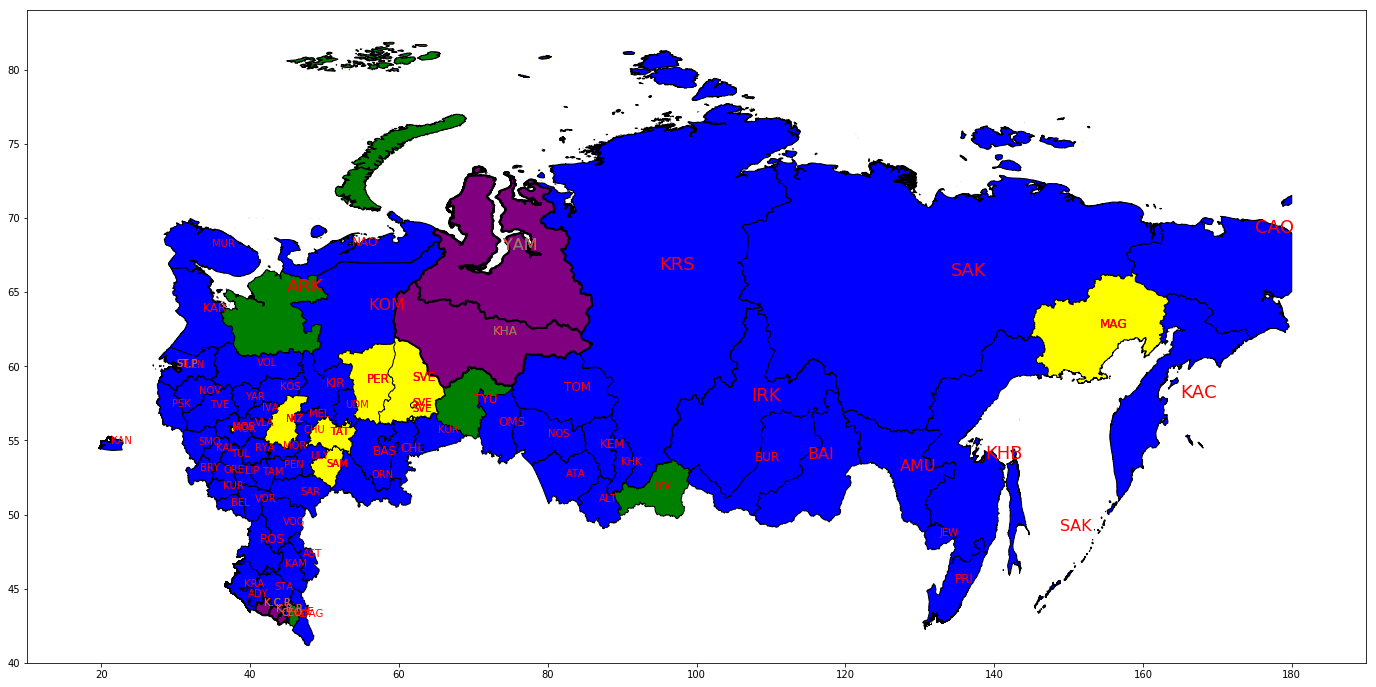

Год:  2009
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
PER пермский (55.63559722900409, 58.9062690734864) 12
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.7878799438476, 56.929761886596694) 10
SVE свердловская (61.728816986084034, 59.02750587463381) 12
TAT татарстан (50.74247741699237, 55.37699317932129) 10
TYU тюменская (70.04089736938494, 57.54407501220705) 12
YAM ямало-ненецкий (74.0233459472656, 67.84946823120126) 16
clustered_inde

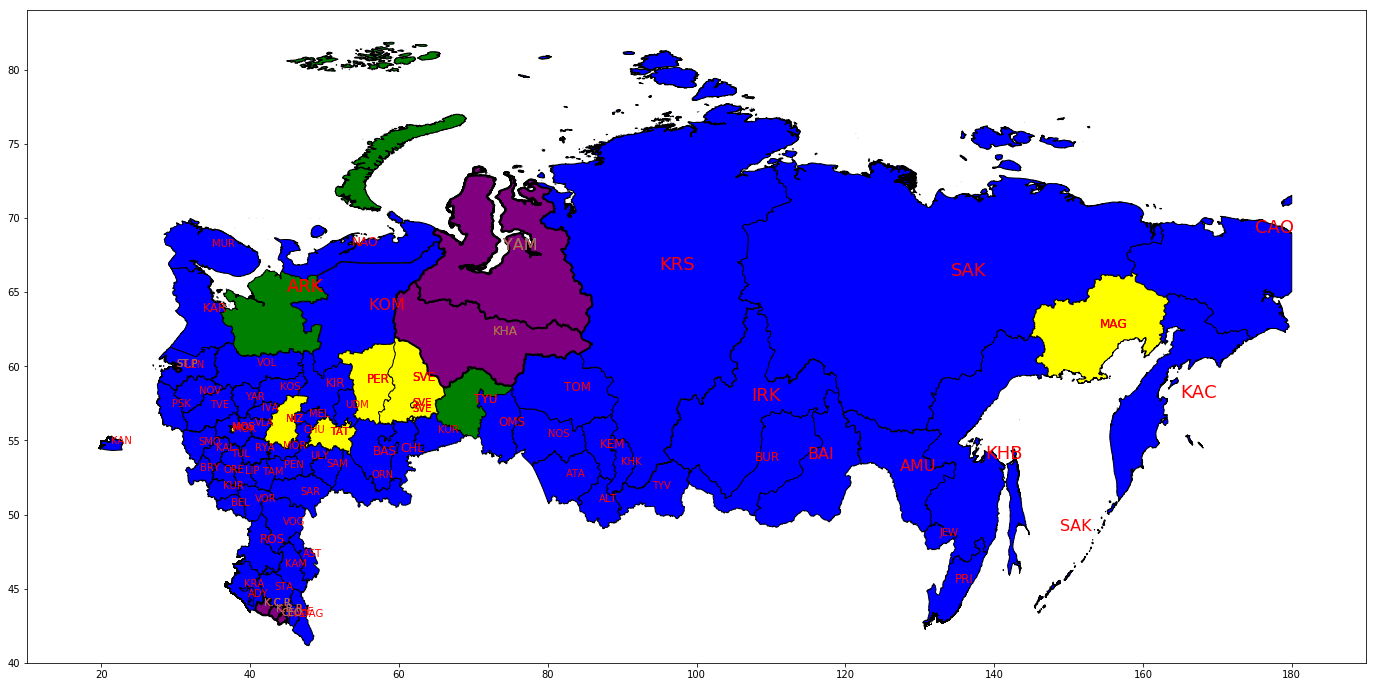

Год:  2010
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
PER пермский (55.63559722900409, 58.9062690734864) 12
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.7878799438476, 56.929761886596694) 10
SVE свердловская (61.728816986084034, 59.02750587463381) 12
TAT татарстан (50.74247741699237, 55.37699317932129) 10
TYU тюменская (70.04089736938494, 57.54407501220705) 12
YAM ямало-ненецкий (74.0233459472656, 67.84946823120126) 16
clustered_inde

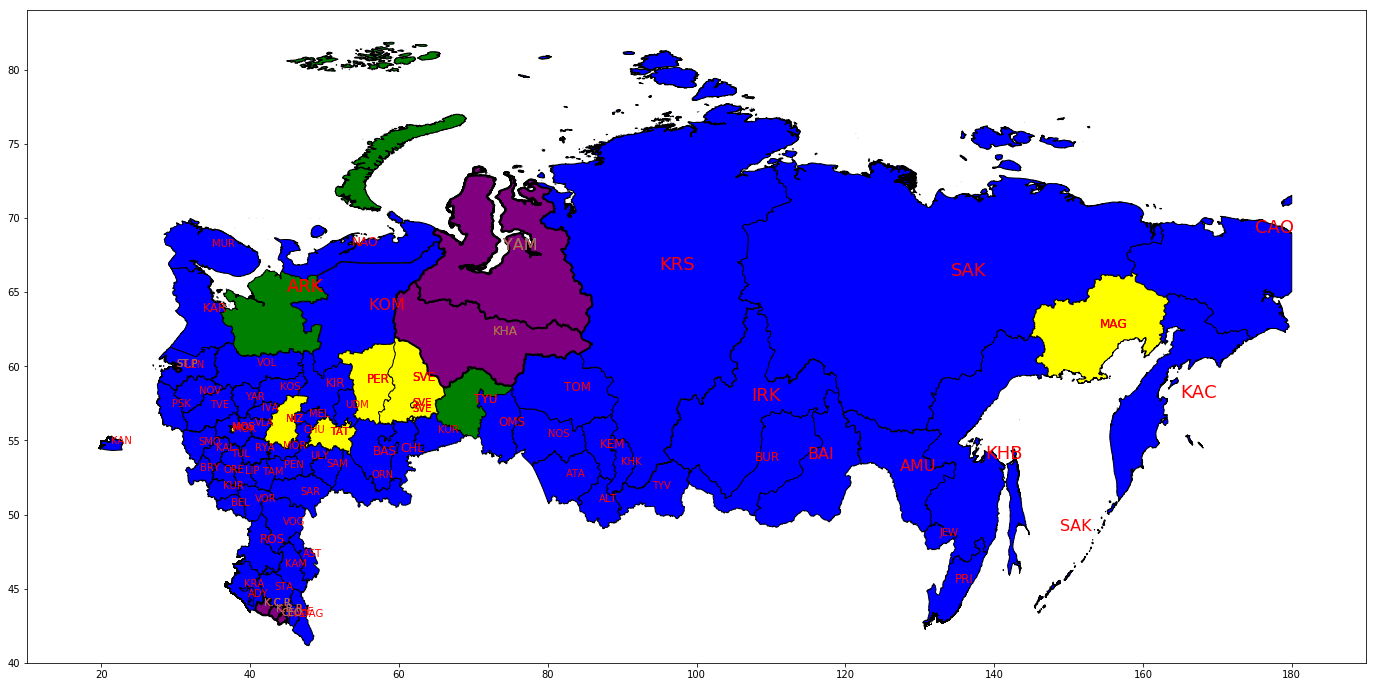

Год:  2011
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
KAC камчатский (165.004135131836, 57.8880233764649) 18
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
SAK сахалинская (148.8623886108399, 48.89266204833987) 16
SVE свердловская (61.86057853698737, 57.33113098144533) 10
SVE свердловская (61.7878799438476, 56.929761886596694) 10
SVE свердловская (61.728816986084034, 59.02750587463381) 12
TAT татарстан (50.74247741699237, 55.37699317932129) 10
TYU тюменская (70.04089736938494, 57.54407501220705) 12
YAM ямало-ненецкий (74.0233459472656, 67.84946823120126) 16
clustered_index_set:  [3, 74]
non_cluster

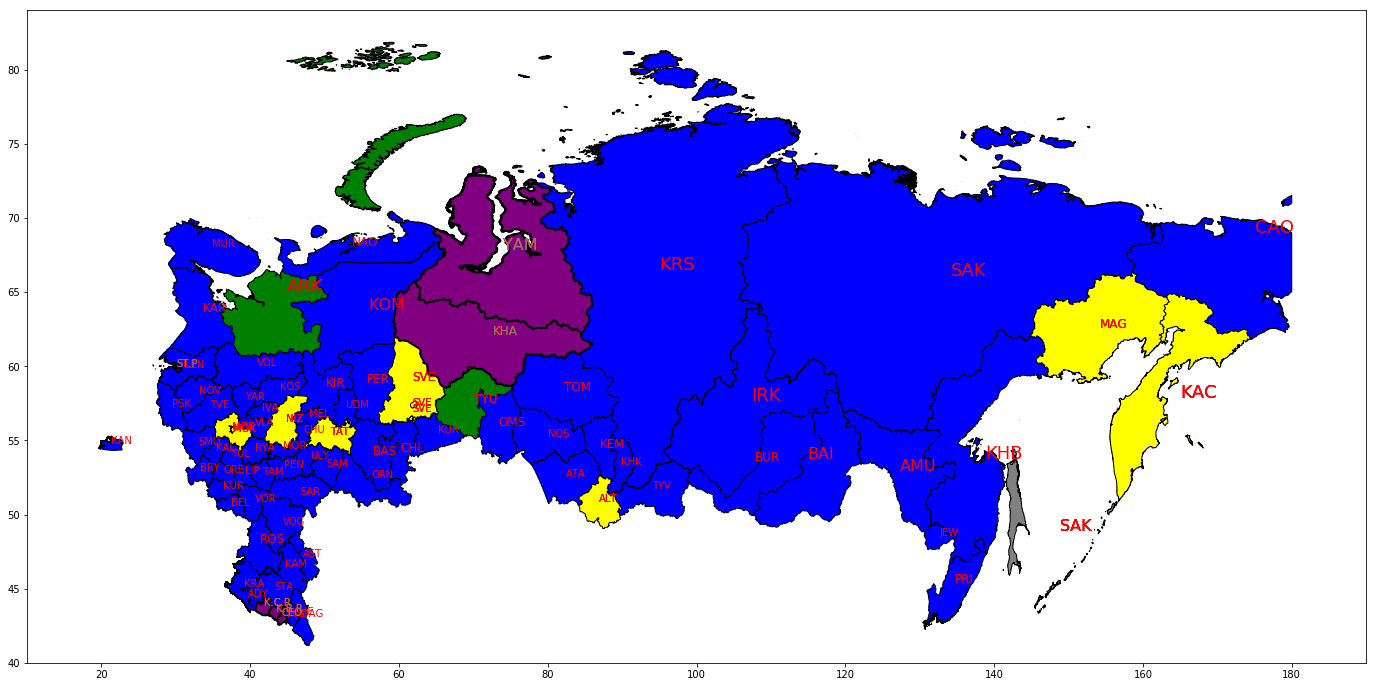

Год:  2012
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

non_clustered_index_set after delete:  [3, 12, 13, 19, 23, 24, 29, 39, 42, 43, 46, 47, 59, 61, 65, 66, 67, 69, 74, 81]
('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
CHU чувашская (47.207590103149556, 55.49068832397468) 10
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
KAC камчатский (165.004135131836, 57.8880233764649) 18
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
SAK сахалинская (148.8623886108399, 48.89266204833987) 16
SAM самарская (50.27296638488773, 53.23889160156259) 10
SVE свердловска

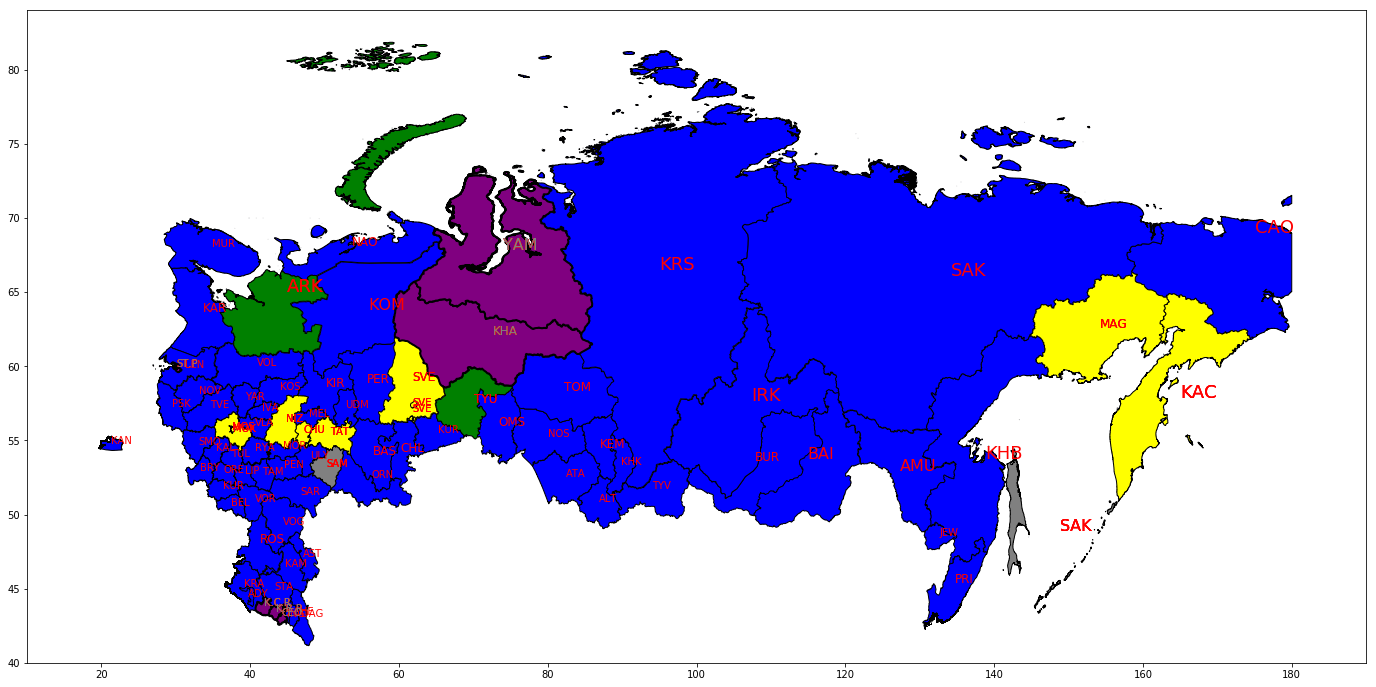

Год:  2013
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

('ARK', 'архангельская', (45.0, 65.0, None))
ARK архангельская (45.0, 65.0) 18
('CAO', 'чукотский', (175, 68.98645782470703, None))
CAO чукотский (175, 68.98645782470703) 18
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
MAG магаданская (154.14532470703136, 62.57715988159187) 12
MOR мордовия (44.45628166198742, 54.418930053711016) 10
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
SAK сахалинская (148.8623886108399, 48.89266204833987) 16
TAT татарстан (50.74247741699237, 55.37699317932129) 10
YAM ямало-ненецкий (74.0233459472656, 67.84946823120126) 16
clustered_index_set:  [11, 39, 41, 

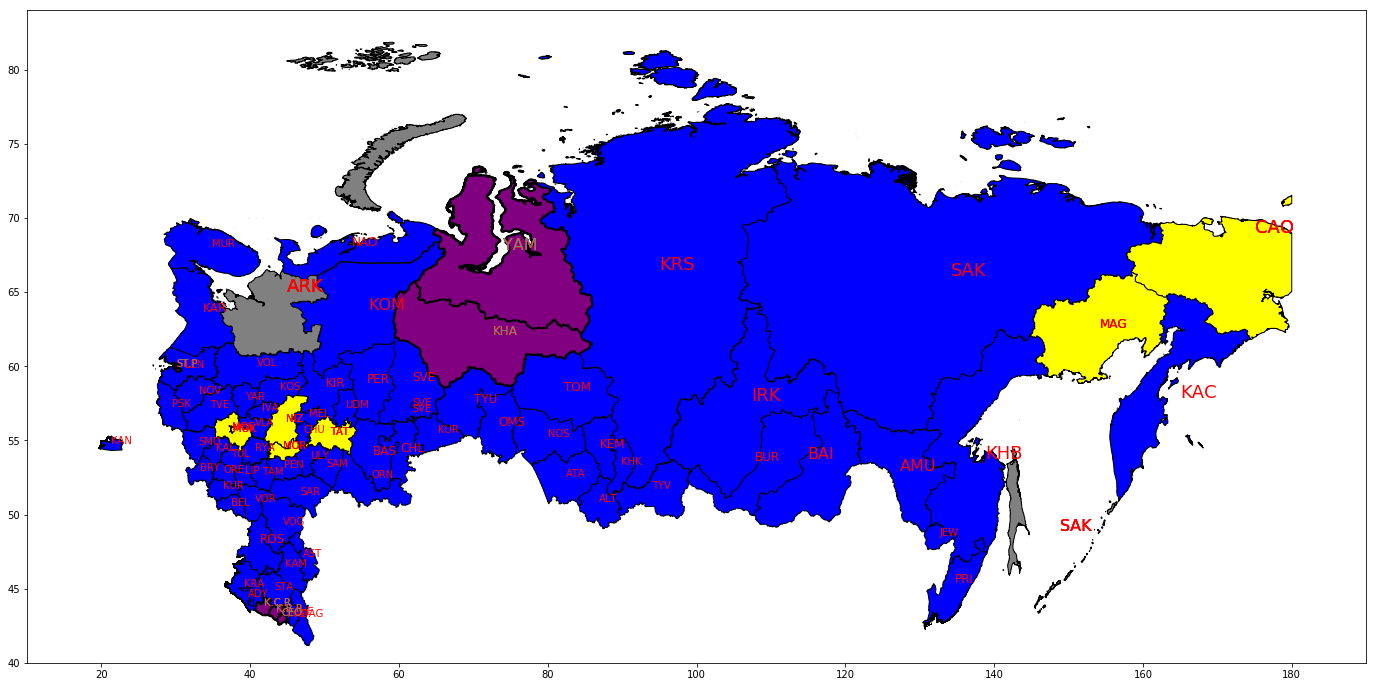

Год:  2014
region_codes:  [('BEL', 'белгородская', None), ('BRY', 'брянская', None), ('VLA', 'владимирская', None), ('VOR', 'воронежская', None), ('IVA', 'ивановская', None), ('KAL', 'калужская', None), ('KOS', 'костромская', None), ('KUR', 'курская', None), ('LIP', 'липецкая', None), ('MOK', 'московская', None), ('ORE', 'орловская', None), ('RYA', 'рязанская', None), ('SMO', 'смоленская', None), ('TAM', 'тамбовская', None), ('TVE', 'тверская', None), ('TUL', 'тульская', None), ('YAR', 'ярославская', None), ('MOS', 'москва', None), ('KAR', 'карелия', None), ('KOM', 'коми', None), ('ARK', 'архангельская', (45.0, 65.0, None)), ('NAO', 'ненецкий', None), ('VOL', 'вологодская', None), ('KAN', 'калининградская', None), ('LEN', 'ленинградская', None), ('MUR', 'мурманская', None), ('NOV', 'новгородская', None), ('PSK', 'псковская', None), ('ST.P', 'санкт-петербург', None), ('ADY', 'адыгея', None), ('KAM', 'калмыкия', None), ('KRA', 'краснодарский', None), ('AST', 'астраханская', None), ('VOG'

('CAO', 'чукотский', (175, 68.98645782470703, None))
CAO чукотский (175, 68.98645782470703) 18
CHU чувашская (47.207590103149556, 55.49068832397468) 10
ST.P санкт-петербург (30.094098091125467, 59.934713363647504) 10
K.B.R кабардино-балкарская (43.52138900756858, 43.41944503784174) 10
K.C.R карачаево-черкессия (41.79793167114272, 43.82976150512705) 10
KHA ханты-мансийский (72.60161018371592, 62.134344100952255) 12
LIP липецкая (39.25826644897474, 52.73612022399908) 10
MOR мордовия (44.45628166198742, 54.418930053711016) 10
MOS москва (37.57399749755875, 55.74336242675785) 10
MOK московская (37.698755264282354, 55.58472824096677) 10
NIZ нижегородская (44.78396034240722, 56.269388198852596) 10
CEO северная осетия (44.198198318481545, 43.159130096435554) 10
SAK сахалинская (148.8623886108399, 48.89266204833987) 16
TAT татарстан (50.74247741699237, 55.37699317932129) 10
YAM ямало-ненецкий (74.0233459472656, 67.84946823120126) 16
clustered_index_set:  []
non_clustered_index_set before delet

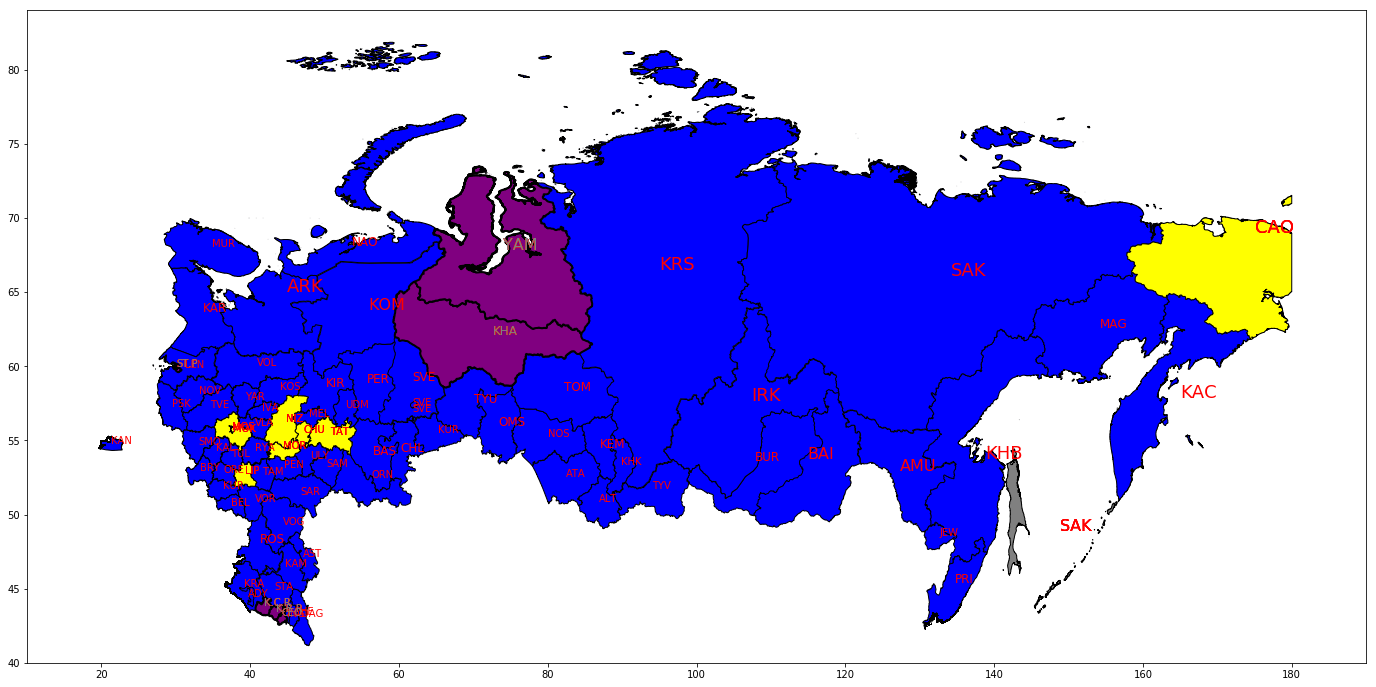

In [88]:
for year in years:
    print("Год: ", year)
    draw_clustered_regions(clustered_map_indexes[year], map_codes_indexes_bijection, region_codes_description, ['blue', 'green', 'yellow', 'gray', 'cyan'], rus_adm_units_shapes)